## Initial steps

#### Step 1: Create a New Folder or Python File in VS Code
* Open VS Code. Create a new folder from VC Code (or using the Finder as well). In VS Code, now we open File > Open Folder and select the newly created folder (e.g. counterspeech-models). We can now create a new Python file within this folder by clicking New File icon and naming. Let's say models.py.
#### Step 2: Create a Virtual Environment
* Open New Terminal within VS Code. First, check we are in the correct directory using Terminal (bash): cd /Users/tonigamundi/Desktop/Counterspeech-Amalia/
* Create a virtual environment called counterspeech in the bash as well: python3 -m venv counterspeech (This command will create a virtual environment named counterspeech in the current directory.)
#### Step 3: Activate the Virtual Environment
* Activate the virtual environment in the bash: source /Users/tonigamundi/Desktop/Counterspeech-Amalia/counterspeech/bin/activate
* We should see the environment name (counterspeech) appear in the terminal, indicating the virtual environment is active.
#### Step 4: Install Required Packages
* Install Jupyter and all required libraries if needed in the bash: pip install jupyter imbalanced-learn scikit-learn
* Now verify that the libraries were installed correctly in the bash: pip list
#### Step 5: Add Virtual Environment to Jupyter as a Kernel
* To make the virtual environment available in Jupyter Notebook, install ipykernel in the bash: pip install ipykernel
* Now, register the virtual environment as a Jupyter kernel: python -m ipykernel install --user --name counterspeech --display-name "Python (counterspeech)" (this command will add the environment as a Jupyter kernel named "Python (counterspeech)".)
#### Step 6: Open Jupyter Notebook in VS Code
* Create a Jupyter notebook in VS Code. In VS Code, click on the New File icon and create a new file with the extension .ipynb (e.g. models_analysis.ipynb).
* At the top right of the notebook interface, click on the kernel selector (which might say something like Python 3). Select "Python (counterspeech)" to ensure that your notebook uses the virtual environment you created.
#### Step 7: Verify the Environment in Your Notebook
* Verify the Correct Python Environment in a notebook cell: 
import sys 
print(sys.executable)
* The output should show the path to the Python executable inside your counterspeech environment, such as /Users/tonigamundi/Desktop/Counterspeech-Amalia/counterspeech/bin/python.

This will ensure that all packages installed in the virtual environment are available in our Jupyter Notebook.



 



Steps if I just want to reopen and activate an environment:

#### Step 1: Navigate to the Folder
* From VS Code, just open the folder that contains your virtual environment by going to File > Open Folder and selecting the appropriate folder (in your case, /Users/tonigamundi/Desktop/Counterspeech-Amalia/).

#### Step 2: Select the Virtual Environment in VS Code (If Using Jupyter Notebooks)
When using Jupyter notebooks in VS Code and want to switch to this environment as your kernel, do the following:
* Open any .ipynb notebook file or create a new one.
* At the top right of the notebook interface, click on the kernel selector (it may say something like Python 3). 
* Select the "Python (counterspeech)" kernel. This ensures that the notebook uses your virtual environment.

#### Step 3: Verify the Active Environment

To ensure the virtual environment is active, run the following command inside your Python file or Jupyter notebook:

`import sys`
`print(sys.executable)`

This should output something like:

bash `/Users/tonigamundi/Desktop/Counterspeech_project/counterspeech/bin/python`

This indicates that the virtual environment is correctly activated.

In [ ]:
import sys
print(sys.executable)


In [ ]:
# Install all necessary libraries
#!pip install pandas scikit-learn numpy imbalanced-learn
# After that, make sure to restart the kernel in our Jupyter notebook to ensure that the newly installed libraries are recognized and properly loaded
#!pip install  nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

import numpy as np
import matplotlib.pyplot as plt
print("All libraries imported successfully!")

All libraries imported successfully!


# Logistic regression models

### 1) TF-IDF with unigrams

In [ ]:
df = pd.read_csv("DFM_tfidf.csv", sep = ",")
df.columns

Index(['Unnamed: 0', 'schwule', 'rechte', 'strasse', 'gehen', 'schoen',
       'sehen', 'freiheitsgedanke', 'international', 'fruechte',
       ...
       'wuetenden', 'maschendraht', 'bildausschnitte', 'pauschalaussagen',
       'auserdem', 'allerwenigsten', 'einziges', 'hir', 'garkein', 'counter'],
      dtype='object', length=5948)

In [4]:
df

,Unnamed: 0,schwule,rechte,strasse,gehen,schoen,sehen,freiheitsgedanke,international,fruechte,...,wuetenden,maschendraht,bildausschnitte,pauschalaussagen,auserdem,allerwenigsten,einziges,hir,garkein,counter
0,1,2.124758,1.516707,1.726818,1.698789,1.601879,1.350646,3.38003,3.38003,3.38003,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
2,3,0.000000,1.516707,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
3,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
4,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,2395,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
2395,2396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1
2396,2397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
2397,2398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,...,3.38003,3.38003,3.38003,3.38003,0.00000,0.00000,0.00000,0.00000,0.00000,0


In [ ]:
X = df.drop(columns=["Unnamed: 0",'counter'])  # the features are X

y = df['counter'] # the label or target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # 70/30 and we set seed and stratify the splits by class given the huge imbalance between classes!

logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0) 
# Specifies L1 regularization (Lasso; L2 would be Ridge), which helps in feature selection by encouraging sparsity (some coefficients are set to zero). 

cv_scores = cross_val_score(logreg_l1, X_train, y_train, cv=10, scoring='accuracy') # CROSS VALIDATION!
# It uses 10 folds in the cross-validation process, meaning it splits the training data into 10 parts, trains on 9, and validates on 1, repeating for each fold!

# Now let's train the logistic regression on the training data
logreg_l1.fit(X_train, y_train)
y_pred = logreg_l1.predict(X_test) # Uses the trained model to predict the target variable for the test set!

# MODEL PERFORMANCE
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {np.mean(cv_scores)}')
print(f'Test Set Accuracy: {accuracy}')
print(f'Confusion Matrix on Test Set:\n {conf_matrix}')

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg_l1.coef_[0]
})

feature_importance = feature_importance.reindex(feature_importance.Coefficient.abs().sort_values(ascending=False).index) # Sorts the features by the absolute value of their coefficients in descending order

feature_importance.to_csv('feature_importance.csv', index=False)

print("Feature importance has been saved to 'feature_importance1.csv'.")

Some notes:
1) The test set accuracy of 90.97% is slightly lower than the mean cross-validation accuracy (93.03%), which is a sign that the model is not generalizing well to unseen data.
2) The high mean accuracy implies that the model is capturing relevant features from the text well, thanks to the TF-IDF feature extraction.
Shortcomings:
1) The confusion matrix indicates that the model is performing well for the majority class but struggles with the minority class (counterspeech).
2) There are only 6 instances correctly classified as negative, which clearly suggests that the **minorty class is underrepresented**.

In [ ]:
# Calculate additional metrics: Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f'\nPrecision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print a full classification report for both classes
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"]))

Some notes:
1) Precision: Only 26% of the comments predicted as counterspeech were actually counterspeech!
2) Recall: Only 11% of actual counterspeech comments were correctly identified by the model, indicating  a high false negative rate.
3) F1 score of 16%: Shows that there is a significant imbalance between precision and recall. The low F1-score highlights that the model is struggling with both correctly identifying counterspeech and minimizing false positives.
Now, regarding the classification report:
1) The model performs extremely well on the "Not Counterspeech" class, with high values for precision, recall, and F1-score.
2) The precision (0.26), recall (0.11), and F1-score (0.16) for the Counterspeech class are considerably lower compared to the Not Counterspeech class. This shows the model struggles significantly to identify counterspeech comments correctly.
In other words -> We should conduct **SMOTE or simple random oversampling (as well as weights)** in order to account for the huge imbalance between classes.

In [7]:
feature_importance.head(15)

,Feature,Coefficient
1966,verurteilen,2.053182
2750,kleiner,2.047971
225,gefaehrlich,1.810060
1473,verlangt,1.779389
4231,einsetzt,1.762844
3064,sachlich,1.735374
1422,widersprechen,1.642630
1480,oberflaechlich,1.629797
3904,griesgram,1.547871
2902,verstoert,1.527784


Notes on the importance of features:
1) Terms like “widersprechen” (contradict) and “verurteilen” (condemn) reflect the core function of counterspeech, which is to directly challenge and push back against hate speech.
2) Words such as “sachlich” (factual) and “erklaert” (explains) indicate a preference for rational, factual responses that aim to correct misinformation and foster a reasoned debate.
3) Words like “verstoert” (upset) and “dich” (you) show that counterspeech also engages on a personal and emotional level, often expressing concern, frustration, or directly confronting other individuals.
4) Words like “verlangt” (demands) indicate that counterspeech is often proactive, calling for change or action rather than merely reacting passively.

* To conclude: it seems that counterspeech has to do with both direct confrontation and rebuttal, emotional appeals, and rational/fact-based discourse.

### 2) TF-IDF with trigrams

In [ ]:
df = pd.read_csv("DFM_tfidf_trigrams.csv", sep = ",")
df.columns

Index(['Unnamed: 0', 'schwule_rechte_strasse', 'rechte_strasse_gehen',
       'strasse_gehen_schoen', 'gehen_schoen_sehen',
       'schoen_sehen_freiheitsgedanke', 'sehen_freiheitsgedanke_international',
       'freiheitsgedanke_international_fruechte',
       'international_fruechte_traegt', 'nehme_christopher_street',
       ...
       'gewalt_user_dies', 'user_dies_deren', 'dies_deren_einziges',
       'deren_einziges_kommen', 'einziges_kommen_doch', 'kommen_doch_hir',
       'doch_hir_garkein', 'hir_garkein_zaun', 'garkein_zaun_oder', 'counter'],
      dtype='object', length=22763)

In [9]:
df

,Unnamed: 0,schwule_rechte_strasse,rechte_strasse_gehen,strasse_gehen_schoen,gehen_schoen_sehen,schoen_sehen_freiheitsgedanke,sehen_freiheitsgedanke_international,freiheitsgedanke_international_fruechte,international_fruechte_traegt,nehme_christopher_street,...,gewalt_user_dies,user_dies_deren,dies_deren_einziges,deren_einziges_kommen,einziges_kommen_doch,kommen_doch_hir,doch_hir_garkein,hir_garkein_zaun,garkein_zaun_oder,counter
0,1,3.38003,2.902909,3.38003,3.38003,3.38003,3.38003,3.38003,3.38003,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
1,2,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.38003,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
2,3,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
3,4,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
4,5,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,2395,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
2395,2396,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1
2396,2397,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
2397,2398,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0


In [ ]:
X = df.drop(columns=["Unnamed: 0",'counter'])  # the features are X

y = df['counter'] # the label or target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1998, stratify=y) # 70/30 and we set seed

logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0) 
# Specifies L1 regularization (Lasso; L2 would be Ridge), which helps in feature selection by encouraging sparsity (some coefficients are set to zero). 

cv_scores = cross_val_score(logreg_l1, X_train, y_train, cv=10, scoring='accuracy') # CROSS VALIDATION!
# It uses 10 folds in the cross-validation process, meaning it splits the training data into 10 parts, trains on 9, and validates on 1, repeating for each fold!

# Now let's train the logistic regression on the training data
logreg_l1.fit(X_train, y_train)
y_pred = logreg_l1.predict(X_test) # Uses the trained model to predict the target variable for the test set!

# MODEL PERFORMANCE
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {np.mean(cv_scores)}')
print(f'Test Set Accuracy: {accuracy}')
print(f'Confusion Matrix on Test Set:\n {conf_matrix}')

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg_l1.coef_[0]
})

feature_importance = feature_importance.reindex(feature_importance.Coefficient.abs().sort_values(ascending=False).index) # Sorts the features by the absolute value of their coefficients in descending order

feature_importance.to_csv('feature_importance2.csv', index=False)

print("Feature importance has been saved to 'feature_importance2.csv'.")

In [ ]:
# Calculate additional metrics: Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f'\nPrecision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print a full classification report for both classes
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"]))

### 3) TF-IDF with unigrams with **random oversampling**: Lasso Regression (L1 Regularization)

In [ ]:
df = pd.read_csv("DFM_tfidf_oversampling.csv", sep = ",")
df.columns

Index(['Unnamed: 0', 'schwule', 'rechte', 'strasse', 'gehen', 'schoen',
       'sehen', 'freiheitsgedanke', 'international', 'fruechte',
       ...
       'erklaert', 'innerpolitischen', 'konflikten', 'verallgemeinern',
       'useralthol', 'userdson', 'problematik', 'bisexuell', 'erstrebenswert',
       'counter'],
      dtype='object', length=5936)

In [13]:
X = df.drop(columns=["Unnamed: 0",'counter'])  # the features are X

y = df['counter'] # the label or target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1998) # 70/30 and we set seed

logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
# Specifies L1 regularization (Lasso; L2 would be Ridge), which helps in feature selection by encouraging sparsity (some coefficients are set to zero). 

cv_scores = cross_val_score(logreg_l1, X_train, y_train, cv=10, scoring='accuracy') # CROSS VALIDATION!
# It uses 10 folds in the cross-validation process, meaning it splits the training data into 10 parts, trains on 9, and validates on 1, repeating for each fold!

# Now let's train the logistic regression on the training data
logreg_l1.fit(X_train, y_train)
y_pred = logreg_l1.predict(X_test) # Uses the trained model to predict the target variable for the test set!

# MODEL PERFORMANCE
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {np.mean(cv_scores)}')
print(f'Test Set Accuracy: {accuracy}')
print(f'Confusion Matrix on Test Set:\n {conf_matrix}')

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg_l1.coef_[0]
})

feature_importance = feature_importance.reindex(feature_importance.Coefficient.abs().sort_values(ascending=False).index) # Sorts the features by the absolute value of their coefficients in descending order

feature_importance.to_csv('feature_importance3.csv', index=False)

print("Feature importance has been saved to 'feature_importance3.csv'.")

Cross-Validation Accuracy Scores: [0.95498392 0.95819936 0.96784566 0.96463023 0.97106109 0.96463023
 0.96451613 0.97419355 0.95483871 0.97741935]
Mean CV Accuracy: 0.9652318224250596
Test Set Accuracy: 0.975975975975976
Confusion Matrix on Test Set:
 [[616  32]
 [  0 684]]
Feature importance has been saved to 'feature_importance3.csv'.



Precision: 0.96
Recall: 1.00
F1 Score: 0.98
ROC-AUC Score: 0.98

Classification Report:
                   precision    recall  f1-score   support

Not Counterspeech       1.00      0.95      0.97       648
    Counterspeech       0.96      1.00      0.98       684

         accuracy                           0.98      1332
        macro avg       0.98      0.98      0.98      1332
     weighted avg       0.98      0.98      0.98      1332



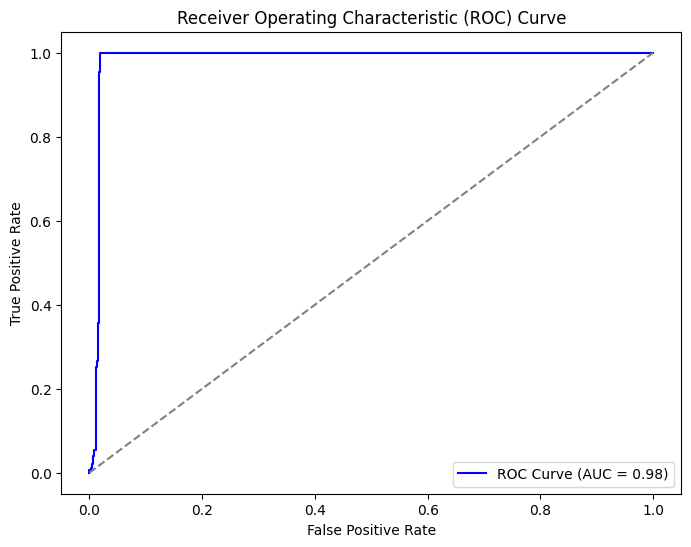

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities for AUC and ROC
y_pred_proba = logreg_l1.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (Counterspeech)

#  Calculate additional metrics: Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'\nPrecision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Print a full classification report for both classes
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"]))

# PLOT ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random chance)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Takeaways:
1)  The narrow range of cross-validation scores suggests the model is not sensitive to different splits of the data, showing robustness in performance.
2) Compared to the original results without oversampling, it seems that **random oversampling has improved the model’s performance** due to more balanced class distribution.
3) Test Accuracy is very high (97%), indicating that the model performs very (even too much) well on unseen data.
4) The model captures **all counterspeech instances without missing any** (Recall = 1.00). This suggests that the model is highly effective in identifying the minority class, which is likely due to the balanced training set achieved by random oversampling. However, the so high accuracy across both cross-validation and the test set suggests a potential **risk of overfitting**, which might limit the model’s performance when exposed to new and different datasets...
2) In this case, I applied random oversampling to the whole dataset (i.e. both training and test sets!) but that isn't the common practice. The common practice is to **apply random oversampling ONLY on the training set**.

Cross-Validation Accuracy Scores: [0.95819936 0.98392283 0.97427653 0.97749196 0.98713826 0.9807074
 0.98387097 0.98709677 0.98709677 0.97741935]
Mean CV Accuracy: 0.9797220205372886
Test Set Accuracy: 0.9041666666666667
Confusion Matrix on Test Set:
 [[643  23]
 [ 46   8]]

Precision: 0.26
Recall: 0.15
F1 Score: 0.19
ROC-AUC Score: 0.72

Classification Report:
                   precision    recall  f1-score   support

Not Counterspeech       0.93      0.97      0.95       666
    Counterspeech       0.26      0.15      0.19        54

         accuracy                           0.90       720
        macro avg       0.60      0.56      0.57       720
     weighted avg       0.88      0.90      0.89       720



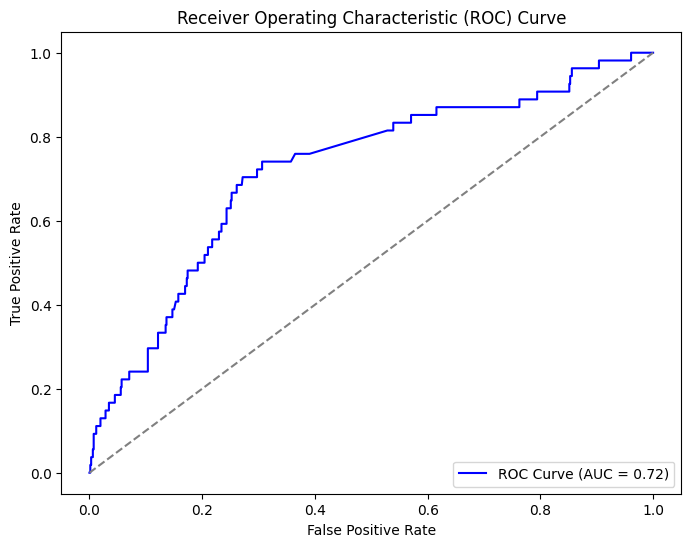

In [15]:
from imblearn.over_sampling import RandomOverSampler

# Step 1
df = pd.read_csv("/Users/tonigamundi/Desktop/Counterspeech-Amalia/counterspeech/DFM_tfidf.csv", sep = ",")

# Step 2
X = df.drop(columns=["Unnamed: 0",'counter']) 
y = df['counter']

# Step 3: Split the dataset into training and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1998, stratify=y)

#### NB: I added stratify=y in train_test_split to ensure that the class distribution is maintained in both the training and test sets

# Step 4: Apply random oversampling to the training set only
oversampler = RandomOverSampler(random_state=1998)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Step 5: Define and perform logistic regression with L1 regularization
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000)

# Step 6: Perform cross-validation on the oversampled training set
cv_scores = cross_val_score(logreg_l1, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

# Step 7: Train the logistic regression model on the oversampled training set
logreg_l1.fit(X_train_resampled, y_train_resampled)

# Step 8: Make predictions on the test set
y_pred = logreg_l1.predict(X_test)

# Step 9: Model performance evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {np.mean(cv_scores)}')
print(f'Test Set Accuracy: {accuracy}')
print(f'Confusion Matrix on Test Set:\n {conf_matrix}')

# Step 10: Calculate Precision, Recall, F1-Score, and ROC-AUC
y_pred_proba = logreg_l1.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (Counterspeech)

precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'\nPrecision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Print a full classification report for both classes
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"]))

# Step 11: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random chance)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Some key notes:
* The *stratified split* ensures that **both the training and test sets are representative of the original class distribution**, which is essential when dealing with imbalanced datasets. This makes sure that we’re not accidentally ending up with a highly imbalanced test set.
* However, once the split is done, you apply **oversampling only on the training set to balance it**. The test set remains untouched, preserving the original imbalance for evaluating the model's performance on realistic data. That's why the stratified split helps maintain realism in evaluating model performance.

Analysis of the output:
1) The F1 score of 0.19 for Counterspeech indicates that while some counterspeech is being correctly identified, the model struggles to comprehensively capture the complex nature of counterspeech. This is likely due to its nuanced language, which can be sarcastic, indirect, or subtle, making it harder for the model to differentiate.
2) The mean cross-validation accuracy of 0.98 indicates that the model performs very well on the training set and during cross-validation. However, this does not translate into similar performance on the test set, where the accuracy drops to 0.90. This discrepancy suggests **potential overfitting**: the model might be learning the specific patterns of the training set during oversampling, but it generalizes poorly to new, unseen data, especially when it comes to the minority class (Counterspeech). This is a common issue when using random oversampling, as the model may become too reliant on the duplicated data points.
3) In any case, this combination of oversampling and stratify did not work out as expected...
4) So I will try with other methods such as **SMOTE and SMOTE along with undersampling**.
5) Finally, while TF-IDF with unigrams is effective, incorporating **bigrams/trigrams** or **word embeddings (like Word2Vec or Doc2Vec)** might allow the model to capture more nuanced relationships in counterspeech!
6) I'll first try these changes noted above and then move to other *SML techniques* and different levels of *regularization*...

How to test if there is overfitting?
* Step 1: Split the Data.

First, I need to split your dataset into training and test sets. Then, I will split the training set further into smaller training and validation subsets to analyze how the model behaves.

* Step 2: Train the Model on Increasing Training Set Sizes

I train the logistic regression model on increasing portions of the training set while keeping a validation set constant. This will allow me to generate learning curves that show the training and validation errors (or accuracy).

* Step 3: Plot Learning Curves
Plot the learning curves for both training and validation accuracy (or error) to visually inspect the bias-variance trade-off.

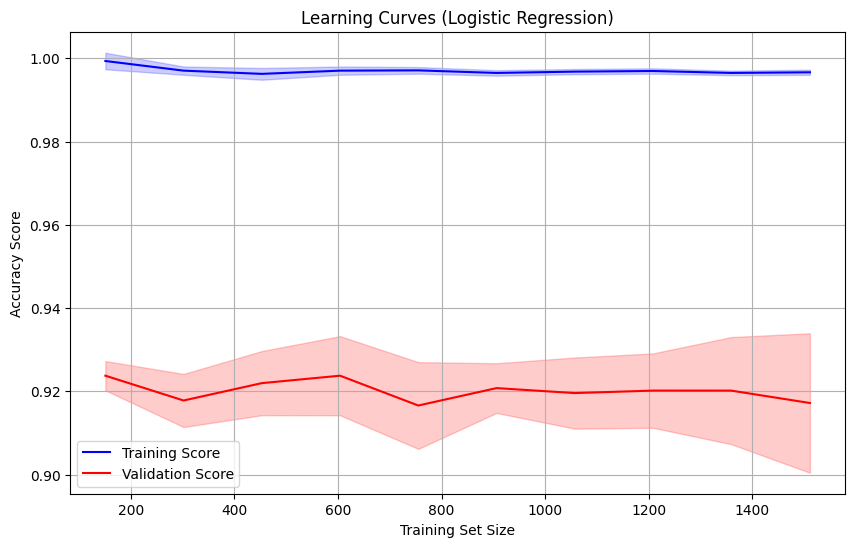

In [16]:
# Testing if there is overfitting looking at bias-variance trade-off

# Generate learning curves using increasing training set sizes
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=logreg_l1,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Vary training set sizes from 10% to 100%
    cv=10,  # 10-fold cross-validation
    scoring='accuracy',  # Scoring metric (you can change this to 'f1', 'precision', etc.)
    n_jobs=-1  # Use all available cores
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, validation_mean, label='Validation Score', color='red')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='red', alpha=0.2)

plt.title('Learning Curves (Logistic Regression)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()

Takeaways:
1) The consistently high training accuracy indicates that the model has low bias, as it can fit the training data almost perfectly. This means the model is sufficiently complex to capture the underlying patterns in the data during training.
2) The gap between training accuracy and validation accuracy is evidence of high variance. The model generalizes less effectively on unseen data, which clearly suggests **overfitting**. The model has learned specific details and potentially noise from the training data, resulting in a perfect training performance but lower performance on new data (validation set).

SUGGESTIONS OR WAYS TO GO:
1) Apply more **regularization** to reduce overfitting and limit the model's ability to memorize the training data. For instance, in logistic regression, you could increase the value of the regularization parameter (C) to penalize large coefficients.
2) Consider experimenting with models that have built-in regularization, such as **Random Forests or Gradient Boosting**, or using **cross-validation-based model tuning** to select the best model and hyperparameters. 


#### 3.1.1 TF-IDF unigrams with random oversampling: **More Regularization**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Step 1
df = pd.read_csv("/counterspeech/DFM_tfidf.csv", sep = ",")

# Step 2
X = df.drop(columns=["Unnamed: 0",'counter']) 
y = df['counter']

# Step 3: Split the dataset into training and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1998, stratify=y)

#### NB: I added stratify=y in train_test_split to ensure that the class distribution is maintained in both the training and test sets

# Step 4: Apply random oversampling to the training set only
oversampler = RandomOverSampler(random_state=1998)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Step 5: Define and perform logistic regression with L1 regularization
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=1000) # note we increased regularization by decreasing C

# Step 6: Perform cross-validation on the oversampled training set
cv_scores = cross_val_score(logreg_l1, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

# Step 7: Train the logistic regression model on the oversampled training set
logreg_l1.fit(X_train_resampled, y_train_resampled)

# Step 8: Make predictions on the test set
y_pred = logreg_l1.predict(X_test)

# Step 9: Model performance evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {np.mean(cv_scores)}')
print(f'Test Set Accuracy: {accuracy}')
print(f'Confusion Matrix on Test Set:\n {conf_matrix}')

# Step 10: Calculate Precision, Recall, F1-Score, and ROC-AUC
y_pred_proba = logreg_l1.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (Counterspeech)

precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'\nPrecision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Print a full classification report for both classes
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"]))

Cross-Validation Accuracy Scores: [0.93569132 0.97749196 0.93569132 0.92282958 0.95498392 0.95176849
 0.93225806 0.95806452 0.92903226 0.94516129]
Mean CV Accuracy: 0.9442972720672129
Test Set Accuracy: 0.8930555555555556
Confusion Matrix on Test Set:
 [[627  39]
 [ 38  16]]

Precision: 0.29
Recall: 0.30
F1 Score: 0.29
ROC-AUC Score: 0.72

Classification Report:
                   precision    recall  f1-score   support

Not Counterspeech       0.94      0.94      0.94       666
    Counterspeech       0.29      0.30      0.29        54

         accuracy                           0.89       720
        macro avg       0.62      0.62      0.62       720
     weighted avg       0.89      0.89      0.89       720



Takeaways:
1) Compared to the previous model with standard regularization, we have applied higher regularization. Precision for Counterspeech improved slightly from 0.26 (C = 1.0) to 0.29 (C = 0.1), while recall increased from 0.15 to 0.30, effectively doubling the recall. This is a key improvement, as the model is now identifying more Counterspeech instances. But still poor performance.
2) The lower cross-validation accuracy and test accuracy indicate that the model is now less prone to overfitting. However, this comes at the cost of slightly lower test performance.

Further steps:

1) Since regularization reduces the model’s capacity to overfit, another approach to maintain or even improve accuracy is to focus on improving the quality of features through feature engineering (e.g. using **additional n-grams**, or more informative linguistic features, as we'll see afterwards when using trigrams!).
2) We could continue experimenting with **different values of C** to see if there is any further improvement. Finding an optimal value for regularization could improve the model's performance.
3) Alternatively, we could try with other regularization techniques (such as **L2 regularization or even elastic net**) to further improve the trade-off.


##### 3.2.1 Different values of C

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Define a logistic regression model
logreg = LogisticRegression(penalty='l1', solver='liblinear')  # Using Lasso (L1) regularization

# Set up the parameter grid to search for the best C value
param_grid = {'C': np.logspace(-4, 4, 10)}  # Search over a wide range of C values (from 0.0001 to 10,000)

# Set up the GridSearchCV to find the optimal C value
grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy', n_jobs=-1)  # You can change 'scoring' to F1, precision, recall if needed

# Fit the model to the training data and search for the best C value
grid_search.fit(X_train, y_train)

# Get the best C value and print it
best_C = grid_search.best_params_['C']
print(f"Best C value: {best_C}")

# Evaluate the model with the optimal C on the test data
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Test F1 Score: {f1}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Step 1
df = pd.read_csv("counterspeech/DFM_tfidf.csv", sep = ",")

# Step 2
X = df.drop(columns=["Unnamed: 0",'counter']) 
y = df['counter']

# Step 3: Split the dataset into training and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1998, stratify=y)

#### NB: I added stratify=y in train_test_split to ensure that the class distribution is maintained in both the training and test sets

# Step 4: Apply random oversampling to the training set only
oversampler = RandomOverSampler(random_state=1998)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Step 5: Define and perform logistic regression with L1 regularization
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.01, max_iter=3000) # note we increased regularization by decreasing C

# Step 6: Perform cross-validation on the oversampled training set
cv_scores = cross_val_score(logreg_l1, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

# Step 7: Train the logistic regression model on the oversampled training set
logreg_l1.fit(X_train_resampled, y_train_resampled)

# Step 8: Make predictions on the test set
y_pred = logreg_l1.predict(X_test)

# Step 9: Model performance evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {np.mean(cv_scores)}')
print(f'Test Set Accuracy: {accuracy}')
print(f'Confusion Matrix on Test Set:\n {conf_matrix}')

# Step 10: Calculate Precision, Recall, F1-Score, and ROC-AUC
y_pred_proba = logreg_l1.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (Counterspeech)

precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'\nPrecision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Print a full classification report for both classes
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"]))

1) The cross-validation accuracy has dropped significantly, from around 0.94–0.98 in previous runs to a mean CV accuracy of 0.625. This sharp drop is a clear indication that the model is now underfitting, meaning it has become too simple due to the increased regularization.
2) The F1 score for Counterspeech has increased slightly to 0.33, reflecting an overall improvement in how the model balances precision and recall. However, it is still low, indicating that the model is far from optimal for Counterspeech detection.

### 3.2) TF-IDF with unigrams with **random oversampling**: Ridge Regression (L2 regularization)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Step 1
df = pd.read_csv("counterspeech/DFM_tfidf.csv", sep = ",")

# Step 2
X = df.drop(columns=["Unnamed: 0",'counter']) 
y = df['counter']

# Step 3: Split the dataset into training and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1998, stratify=y)

#### NB: I added stratify=y in train_test_split to ensure that the class distribution is maintained in both the training and test sets

# Step 4: Apply random oversampling to the training set only
oversampler = RandomOverSampler(random_state=1998)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Step 5: Define and perform logistic regression with L1 regularization
logreg_l1 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0, max_iter=1000) # note we increased regularization by decreasing C

# Step 6: Perform cross-validation on the oversampled training set
cv_scores = cross_val_score(logreg_l1, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

# Step 7: Train the logistic regression model on the oversampled training set
logreg_l1.fit(X_train_resampled, y_train_resampled)

# Step 8: Make predictions on the test set
y_pred = logreg_l1.predict(X_test)

# Step 9: Model performance evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {np.mean(cv_scores)}')
print(f'Test Set Accuracy: {accuracy}')
print(f'Confusion Matrix on Test Set:\n {conf_matrix}')

# Step 10: Calculate Precision, Recall, F1-Score, and ROC-AUC
y_pred_proba = logreg_l1.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (Counterspeech)

precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'\nPrecision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Print a full classification report for both classes
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"]))

Cross-Validation Accuracy Scores: [0.97427653 0.99678457 0.9807074  0.98392283 0.97749196 0.99678457
 0.98709677 0.98709677 0.99354839 0.98387097]
Mean CV Accuracy: 0.9861580748884972
Test Set Accuracy: 0.9138888888888889
Confusion Matrix on Test Set:
 [[650  16]
 [ 46   8]]

Precision: 0.33
Recall: 0.15
F1 Score: 0.21
ROC-AUC Score: 0.69

Classification Report:
                   precision    recall  f1-score   support

Not Counterspeech       0.93      0.98      0.95       666
    Counterspeech       0.33      0.15      0.21        54

         accuracy                           0.91       720
        macro avg       0.63      0.56      0.58       720
     weighted avg       0.89      0.91      0.90       720



1) With Ridge regularization, the coefficients are penalized more evenly, meaning that large coefficients are reduced, but the model doesn't force many coefficients to exactly zero, as Lasso does.
2) Ridge regression generally results in better stability and generalization when there is no clear indication that sparsity (many coefficients being zero) is crucial. In this case, it seems that this is helping the model balance flexibility and generalization more evenly than Lasso.
3) However, the improvement is minimal, so let's try with higher regularization...

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Step 1
df = pd.read_csv("counterspeech/DFM_tfidf.csv", sep = ",")

# Step 2
X = df.drop(columns=["Unnamed: 0",'counter']) 
y = df['counter']

# Step 3: Split the dataset into training and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1998, stratify=y)

#### NB: I added stratify=y in train_test_split to ensure that the class distribution is maintained in both the training and test sets

# Step 4: Apply random oversampling to the training set only
oversampler = RandomOverSampler(random_state=1998)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Step 5: Define and perform logistic regression with L1 regularization
logreg_l1 = LogisticRegression(penalty='l2', solver='liblinear', C=0.1, max_iter=1000) # note we increased regularization by decreasing C

# Step 6: Perform cross-validation on the oversampled training set
cv_scores = cross_val_score(logreg_l1, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

# Step 7: Train the logistic regression model on the oversampled training set
logreg_l1.fit(X_train_resampled, y_train_resampled)

# Step 8: Make predictions on the test set
y_pred = logreg_l1.predict(X_test)

# Step 9: Model performance evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {np.mean(cv_scores)}')
print(f'Test Set Accuracy: {accuracy}')
print(f'Confusion Matrix on Test Set:\n {conf_matrix}')

# Step 10: Calculate Precision, Recall, F1-Score, and ROC-AUC
y_pred_proba = logreg_l1.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (Counterspeech)

precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'\nPrecision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Print a full classification report for both classes
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"]))

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Step 1
df = pd.read_csv("counterspeech/DFM_tfidf.csv", sep = ",")

# Step 2
X = df.drop(columns=["Unnamed: 0",'counter']) 
y = df['counter']

# Step 3: Split the dataset into training and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1998, stratify=y)

#### NB: I added stratify=y in train_test_split to ensure that the class distribution is maintained in both the training and test sets

# Step 4: Apply random oversampling to the training set only
oversampler = RandomOverSampler(random_state=1998)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Step 5: Define and perform logistic regression with L1 regularization
logreg_l1 = LogisticRegression(penalty='l2', solver='liblinear', C=0.01, max_iter=1000) # note we increased regularization by decreasing C

# Step 6: Perform cross-validation on the oversampled training set
cv_scores = cross_val_score(logreg_l1, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

# Step 7: Train the logistic regression model on the oversampled training set
logreg_l1.fit(X_train_resampled, y_train_resampled)

# Step 8: Make predictions on the test set
y_pred = logreg_l1.predict(X_test)

# Step 9: Model performance evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {np.mean(cv_scores)}')
print(f'Test Set Accuracy: {accuracy}')
print(f'Confusion Matrix on Test Set:\n {conf_matrix}')

# Step 10: Calculate Precision, Recall, F1-Score, and ROC-AUC
y_pred_proba = logreg_l1.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (Counterspeech)

precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'\nPrecision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Print a full classification report for both classes
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"]))

Again, there is clear risk of overfitting. It performs poorly when faced with new, unseen data... Let's try with SMOTE instead of random oversampling to test if there are some improvements, because both Lasso and Ridge perform poor in classifying counterspeech.

### 4) TF-IDF with unigrams with **SMOTE** 

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Step 1
df = pd.read_csv("counterspeech/DFM_tfidf.csv", sep = ",")

# Step 2
X = df.drop(columns=["Unnamed: 0",'counter']) 
y = df['counter']

# Step 3: Split the dataset into training and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1998, stratify=y)

#### NB: I added stratify=y in train_test_split to ensure that the class distribution is maintained in both the training and test sets

# Step 4: Apply random oversampling to the training set only
smote = SMOTE(random_state=1998)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Define and perform logistic regression with L1 regularization
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000) # note we increased regularization by decreasing C

# Step 6: Perform cross-validation on the oversampled training set
cv_scores = cross_val_score(logreg_l1, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

# Step 7: Train the logistic regression model on the oversampled training set
logreg_l1.fit(X_train_resampled, y_train_resampled)

# Step 8: Make predictions on the test set
y_pred = logreg_l1.predict(X_test)

# Step 9: Model performance evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {np.mean(cv_scores)}')
print(f'Test Set Accuracy: {accuracy}')
print(f'Confusion Matrix on Test Set:\n {conf_matrix}')

# Step 10: Calculate Precision, Recall, F1-Score, and ROC-AUC
y_pred_proba = logreg_l1.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (Counterspeech)

precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'\nPrecision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Print a full classification report for both classes
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"]))

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Step 1
df = pd.read_csv("counterspeech/DFM_tfidf.csv", sep = ",")

# Step 2
X = df.drop(columns=["Unnamed: 0",'counter']) 
y = df['counter']

# Step 3: Split the dataset into training and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1998, stratify=y)

#### NB: I added stratify=y in train_test_split to ensure that the class distribution is maintained in both the training and test sets

# Step 4: Apply SMOTE to the training set only
smote = SMOTE(random_state=1998)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Define and perform logistic regression with L2 regularization
logreg_l1 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0, max_iter=1000) # note we increased regularization by decreasing C

# Step 6: Perform cross-validation on the oversampled training set
cv_scores = cross_val_score(logreg_l1, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

# Step 7: Train the logistic regression model on the oversampled training set
logreg_l1.fit(X_train_resampled, y_train_resampled)

# Step 8: Make predictions on the test set
y_pred = logreg_l1.predict(X_test)

# Step 9: Model performance evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {np.mean(cv_scores)}')
print(f'Test Set Accuracy: {accuracy}')
print(f'Confusion Matrix on Test Set:\n {conf_matrix}')

# Step 10: Calculate Precision, Recall, F1-Score, and ROC-AUC
y_pred_proba = logreg_l1.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (Counterspeech)

precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'\nPrecision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Print a full classification report for both classes
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"]))

In [ ]:
from imblearn.combine import SMOTETomek

# Step 1: Load the dataset
df = pd.read_csv("counterspeech/DFM_tfidf.csv", sep = ",")

# Step 2: Define features (X) and label (y)
X = df.drop(columns=["Unnamed: 0",'counter']) 
y = df['counter']

# Step 3: Split the dataset into training and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1998, stratify=y)

#### NB: Stratify=y in train_test_split ensures class distribution is maintained in both the training and test sets

# Step 4: Apply SMOTE combined with undersampling (SMOTETomek) to the training set only
smote_tomek = SMOTETomek(random_state=1998)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Step 5: Define and perform logistic regression with L1 regularization
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000) # L1 regularization (Lasso)

# Step 6: Perform cross-validation on the resampled training set
cv_scores = cross_val_score(logreg_l1, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

# Step 7: Train the logistic regression model on the resampled training set
logreg_l1.fit(X_train_resampled, y_train_resampled)

# Step 8: Make predictions on the test set
y_pred = logreg_l1.predict(X_test)

# Step 9: Model performance evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {np.mean(cv_scores)}')
print(f'Test Set Accuracy: {accuracy}')
print(f'Confusion Matrix on Test Set:\n {conf_matrix}')

# Step 10: Calculate Precision, Recall, F1-Score, and ROC-AUC
y_pred_proba = logreg_l1.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (Counterspeech)

precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'\nPrecision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Print a full classification report for both classes
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"]))

It performs poorly again

### 5) TF-IDF with trigrams with **random oversampling**: Lasso & Ridge

In [ ]:
df_tfidf = pd.read_csv("counterspeech/DFM_tfidf_trigrams.csv", sep = ",")
df_tfidf

,Unnamed: 0,schwule_rechte_strasse,rechte_strasse_gehen,strasse_gehen_schoen,gehen_schoen_sehen,schoen_sehen_freiheitsgedanke,sehen_freiheitsgedanke_international,freiheitsgedanke_international_fruechte,international_fruechte_traegt,nehme_christopher_street,...,gewalt_user_dies,user_dies_deren,dies_deren_einziges,deren_einziges_kommen,einziges_kommen_doch,kommen_doch_hir,doch_hir_garkein,hir_garkein_zaun,garkein_zaun_oder,counter
0,1,3.38003,2.902909,3.38003,3.38003,3.38003,3.38003,3.38003,3.38003,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
1,2,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.38003,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
2,3,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
3,4,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
4,5,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,2395,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
2395,2396,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1
2396,2397,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
2397,2398,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0


In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

X = df_tfidf.drop(columns=["Unnamed: 0",'counter'])  # the features are X
y = df_tfidf['counter']  # Target variable (counter label)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 92382838, stratify=y)

# Step 3: Apply random oversampling to the training set
oversampler = RandomOverSampler(random_state=92382838)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Step 4: Train a logistic regression model with L1 regularization (Lasso)
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
logreg_l1.fit(X_train_oversampled, y_train_oversampled)

# Step 5: Evaluate the model on the test set
y_pred = logreg_l1.predict(X_test)

# Step 6: Model performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 7: Cross-validation with SMOTE and TF-IDF features
cv_scores = cross_val_score(logreg_l1, X_train_oversampled, y_train_oversampled, cv=10, scoring='accuracy')

# Print results
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')
print(f'Test Set Accuracy: {accuracy}')
print(f'Confusion Matrix on Test Set:\n {conf_matrix}')
print(f'\nPrecision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print a full classification report for both classes
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"]))

Really poor performance again!

### 6) TF-IDF with trigrams with **SMOTE** 

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

df_tfidf = pd.read_csv("counterspeech/DFM_tfidf_trigrams.csv", sep = ",")
df_tfidf

,Unnamed: 0,schwule_rechte_strasse,rechte_strasse_gehen,strasse_gehen_schoen,gehen_schoen_sehen,schoen_sehen_freiheitsgedanke,sehen_freiheitsgedanke_international,freiheitsgedanke_international_fruechte,international_fruechte_traegt,nehme_christopher_street,...,gewalt_user_dies,user_dies_deren,dies_deren_einziges,deren_einziges_kommen,einziges_kommen_doch,kommen_doch_hir,doch_hir_garkein,hir_garkein_zaun,garkein_zaun_oder,counter
0,1,3.38003,2.902909,3.38003,3.38003,3.38003,3.38003,3.38003,3.38003,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
1,2,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.38003,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
2,3,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
3,4,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
4,5,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,2395,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
2395,2396,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1
2396,2397,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
2397,2398,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0


In [ ]:
X = df_tfidf.drop(columns=["Unnamed: 0",'counter'])  # the features are X
y = df_tfidf['counter']  # Target variable (counter label)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1998, stratify=y)

# Apply SMOTE to the training set to handle class imbalance by generating synthetic samples for the minority class.
smote = SMOTE(random_state=9999)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 4: Train a logistic regression model with L1 regularization (Lasso)
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=200)  # C can be tuned
logreg_l1.fit(X_train_smote, y_train_smote)

# Step 5: Evaluate the model on the test set
y_pred = logreg_l1.predict(X_test)

# Step 6: Model performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 7: Cross-validation with SMOTE and TF-IDF features
cv_scores = cross_val_score(logreg_l1, X_train_smote, y_train_smote, cv=10, scoring='accuracy')

# Print results
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')
print(f'Test Set Accuracy: {accuracy}')
print(f'Confusion Matrix on Test Set:\n {conf_matrix}')
print(f'\nPrecision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print a full classification report for both classes
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"]))

1) Again, it does not classify counterspeech instances correctly.

* NB: To apply undersampling combined with SMOTE in Python, we can use a technique called SMOTEENN (SMOTE + Edited Nearest Neighbors) or SMOTETomek (SMOTE + Tomek Links), which first applies SMOTE to handle the minority class and then undersamples the majority class to remove noisy examples. 

2) Let's try both SMOTE on the minority class and undersampling for the majority class...

### 6.2) TF-IDF with trigrams with **SMOTE and undersampling**

In [ ]:
from imblearn.combine import SMOTETomek

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1998, stratify=y)

# Step 3: Apply SMOTE + Undersampling (SMOTETomek) to the training set
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Step 4: Train a logistic regression model with L1 regularization (Lasso)
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)  # C can be tuned
logreg_l1.fit(X_train_resampled, y_train_resampled)

# Step 5: Evaluate the model on the test set
y_pred = logreg_l1.predict(X_test)

# Step 6: Model performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 7: Cross-validation with SMOTE + undersampling (SMOTETomek) and TF-IDF trigram features
cv_scores = cross_val_score(logreg_l1, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

# Print results
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')
print(f'Test Set Accuracy: {accuracy}')
print(f'Confusion Matrix on Test Set:\n {conf_matrix}')
print(f'\nPrecision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print a full classification report for both classes
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"]))


### 7) Document embeddings (Doc2Vec + BERT)

Some key notes regarding the use of word and document embeddings:
1) Tweets or short comments typically consist of few words, making document embeddings a natural fit because they capture the entire context of the comment in a single vector. Using word embeddings could still be useful, but since each comment contains so few words, their effectiveness might be limited compared to document embeddings that summarize the entire tweet.
2) If we are interested in understanding the individual importance of words (e.g. the importance of a word like "hate" or "support" in counterspeech), word embeddings could be informative. However, tweets/comments often contain specific phrases or multiple words that work together to convey meaning, and so document embeddings might capture more effectively.

In [ ]:
df_cleaned = pd.read_csv("counterspeech/df_cleaned.csv", sep = ",")
df_cleaned

,Unnamed: 0,comment,counter,id,comment_cleaned,language,comment_lemmatized,comment_length
0,1,"Schwule, die für ihre Rechte auf die Straße ge...",0,1,schwule rechte strasse gehen schoen sehen frei...,german,schwul rechte strassen gehen scho sehen freihe...,10
1,2,Ich nehme an das ist der Christopher Street Da...,0,2,nehme christopher street day oae asiatischen l...,german,nehmen christopher streen day oa asiatischen l...,19
2,3,Solange Homosexuelle nicht in allen Ländern si...,0,3,solange homosexuelle nicht allen laendern sich...,german,solange homosexuell nicht alle laendern sicher...,18
3,4,Homosexualität wird in unserer Gesellschaft of...,0,4,homosexualitaet gesellschaft oftmals gegeissel...,german,homosexualitaen sellschafen oftmals gegeisselt...,7
4,5,"Echt schade, dass dafür extra eine Parade stat...",0,5,echt schade dafuer extra parade finden und nic...,german,echt schade dafuer extra parade finden und nic...,10
...,...,...,...,...,...,...,...,...
2394,2395,Ich bitte euch darum dieses Bild genau anzuseh...,0,2421,bitte euch bild genau anzusehen menschen schle...,german,bitten ihr bild genau ansehen mensch schlecht ...,33
2395,2396,"Wie kannst du nur so etwas behaupten, Wintergr...",1,2422,du behaupten wintergruen meisten unendliches l...,german,du behaupten wintergruen meist unendlich leid ...,11
2396,2397,"Gartenzaunvorstand, zu bist so einseitig. Sie ...",0,2423,gartenzaunvorstand einseitig laufen neuen hoff...,german,gartenzaunvorstehen einseitig laufen neu hoffe...,7
2397,2398,Ich kann usercfor nicht zustimmen. Ich sehe ke...,0,2424,usercfor nicht zustimmen sehe keine wuetenden ...,german,usercfor nicht zustimmen sehe kein wuetend flu...,40


In [35]:
# Step 1: Keep only the relevant columns (comment_cleaned and counter)
df_cleaned_filtered = df_cleaned[['comment_cleaned', 'counter']]
df_cleaned_filtered

,comment_cleaned,counter
0,schwule rechte strasse gehen schoen sehen frei...,0
1,nehme christopher street day oae asiatischen l...,0
2,solange homosexuelle nicht allen laendern sich...,0
3,homosexualitaet gesellschaft oftmals gegeissel...,0
4,echt schade dafuer extra parade finden und nic...,0
...,...,...
2394,bitte euch bild genau anzusehen menschen schle...,0
2395,du behaupten wintergruen meisten unendliches l...,1
2396,gartenzaunvorstand einseitig laufen neuen hoff...,0
2397,usercfor nicht zustimmen sehe keine wuetenden ...,0


In [36]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Step 2: Tokenize the comment_cleaned column and prepare TaggedDocument objects for Doc2Vec
tagged_docs = [TaggedDocument(words=row.split(), tags=[str(i)]) for i, row in enumerate(df_cleaned_filtered['comment_cleaned'])]

# Step 3: Train the Doc2Vec model
model_d2v = Doc2Vec(tagged_docs, vector_size=100, window=8, min_count=2, workers=4, epochs=10)
# The window size defines the maximum distance between the current word and the surrounding words that the model considers when building word embeddings.
# The min_count parameter specifies the minimum frequency of words that will be considered in the model. Words that appear less than min_count times in the corpus are ignored.
# The workers parameter specifies the number of CPU cores to use when training the model.

# Step 4: Save the trained Doc2Vec model (optional, for later use)
model_d2v.save("doc2vec_model.model")

# Step 5: Generate Doc2Vec embeddings for each document in the dataset
# The `infer_vector` function generates a vector representation of the document
df_cleaned_filtered['doc2vec_embeddings'] = df_cleaned_filtered['comment_cleaned'].apply(lambda x: model_d2v.infer_vector(x.split()))

# Step 6: Save the resulting dataframe with embeddings to a CSV file
df_cleaned_filtered.to_csv('doc2vec_embeddings.csv', index=False)

# Optionally, check the first few rows to see the embeddings
print(df_cleaned_filtered.head())

/var/folders/pr/s91hbd9d4gq_flqnt0s42m300000gn/T/ipykernel_4801/2863152071.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_filtered['doc2vec_embeddings'] = df_cleaned_filtered['comment_cleaned'].apply(lambda x: model_d2v.infer_vector(x.split()))


                                     comment_cleaned  counter  \
0  schwule rechte strasse gehen schoen sehen frei...        0   
1  nehme christopher street day oae asiatischen l...        0   
2  solange homosexuelle nicht allen laendern sich...        0   
3  homosexualitaet gesellschaft oftmals gegeissel...        0   
4  echt schade dafuer extra parade finden und nic...        0   

                                  doc2vec_embeddings  
0  [-0.004673641, 0.0005091863, -0.0041475664, -0...  
1  [-0.01988966, 0.042408857, 0.027161792, -0.019...  
2  [-0.00712244, 0.008098293, 0.0067138784, 6.438...  
3  [-0.0005600981, -0.006271284, -0.0067579416, 0...  
4  [-0.0074888435, 0.01806344, 0.011724604, -0.01...  


Some notes:
1) Regarding the embeddings column: The doc2vec_embeddings column contains numeric vectors for each comment in the comment_cleaned column. These vectors represent the document embeddings generated by the Doc2Vec model. Each vector is a dense representation of the entire comment, capturing its semantic meaning in a multi-dimensional space (based on the vector size I specified).
2) In NLP, the choice of vector size typically depends on the nature of the data. For short texts like these comments/tweets (which average 15-20 words, as we saw in R when preparing the data), a vector size between 50 and 300 is commonly used in social media studies to balance the semantic richness of the embeddings and computational efficiency.
3) A vector size of 100 is often chosen as a starting point because it often works well in tasks like sentiment analysis, topic modeling, and classification of short content.
4) From practical experience and from other NLP studies, training Doc2Vec models for around 5 to 20 epochs often yields good results. Starting with 10 epochs is common because it is neither too short (where the model might miss important relationships) nor too long (where overfitting could occur).
5) Using 4 CPU cores (`workers = 4`) allows for faster training by parallelizing the workload, making the training process more efficient for handling a dataset of short texts.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Step 1: Load the dataset with doc2vec embeddings
df = pd.read_csv('counterspeech/doc2vec_embeddings.csv', sep=",")

# Define a function to safely parse the embedding strings
def parse_embedding_string(embedding_str):
    return list(map(float, embedding_str.strip('[]').split()))

# Step 2: Prepare the features (Doc2Vec embeddings) and target (counter)
# Apply the function to convert the embeddings to lists of floats
X = df['doc2vec_embeddings'].apply(parse_embedding_string).tolist()
y = df['counter']  # Target variable (counterspeech label)

# Step 3: Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=521998, stratify=y)

# Step 4: Initialize and train a logistic regression model
logreg = LogisticRegression(max_iter=1000, class_weight='balanced') # Increased max_iter to ensure convergence + weights
logreg.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = logreg.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)  # Assuming 1 is the label for counterspeech
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'\nClassification Report:\n{classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"])}')


Not really good classifier... Let's try with word and document embeddings using OpenAI's API to access their word embedding models.

However, before that, let's try combining document embeddings and SMOTE or random oversampling.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Step 1: Load the dataset with doc2vec embeddings
df = pd.read_csv('/Users/tonigamundi/Desktop/Counterspeech-Amalia/counterspeech/doc2vec_embeddings.csv', sep=",")

# Define a function to safely parse the embedding strings
def parse_embedding_string(embedding_str):
    return list(map(float, embedding_str.strip('[]').split()))

# Step 2: Prepare the features (Doc2Vec embeddings) and target (counter)
# Apply the function to convert the embeddings to lists of floats
X = df['doc2vec_embeddings'].apply(parse_embedding_string).tolist()
y = df['counter']  # Target variable (counterspeech label)

# Step 3: Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=521998, stratify=y)

# Step 4: Initialize and train a logistic regression model
logreg = LogisticRegression(penalty="l1",solver="liblinear", max_iter=1000, class_weight='balanced') # Increased max_iter to ensure convergence + weights
logreg.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = logreg.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'\nClassification Report:\n{classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"])}')


In [ ]:
########## Document embeddings (DOC2VEC) with SMOTE + STRATIFY + CLASS WEIGHTS   ##############

# Step 1: Load the dataset with doc2vec embeddings
df = pd.read_csv('/Users/tonigamundi/Desktop/Counterspeech-Amalia/counterspeech/doc2vec_embeddings.csv', sep=",")

# Define a function to safely parse the embedding strings
def parse_embedding_string(embedding_str):
    return list(map(float, embedding_str.strip('[]').split()))

# Step 2: Prepare the features (Doc2Vec embeddings) and target (counter)
X = df['doc2vec_embeddings'].apply(parse_embedding_string).tolist()
y = df['counter']  # Target variable (counterspeech label)

# Step 3: Split the data into training and test sets (70% train, 30% test), stratifying by class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=521998, stratify=y)

# Step 4: Apply SMOTE to the training data (balancing the classes)
smote = SMOTE(random_state=521998)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Initialize and train a logistic regression model with L1 regularization (no class_weight since SMOTE is used)
logreg = LogisticRegression(penalty="l1", solver="liblinear", max_iter=1000) 
logreg.fit(X_train_resampled, y_train_resampled)

# Step 6: Predict on the test set
y_pred = logreg.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'\nClassification Report:\n{classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"])}')



A potential issue is that most word/document embedding models are trained in English corpora! So let's try with German-based models instead

***WATCH OUT WHEN REPLICATING - GENERATING DOCUMENT EMBEDDINGS WITH BERT MODEL TOOK ME OVER 5 MINUTES AND 200% OF CPU USAGE - ALMOST BURNED!***

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# pip install transformers
df_cleaned = pd.read_csv("counterspeech/df_cleaned.csv", sep = ",")
df_cleaned_filtered = df_cleaned[['comment_cleaned', 'counter']]


# Step 2: Load the pre-trained BERT model and tokenizer (German-specific model)
tokenizer = BertTokenizer.from_pretrained('dbmdz/bert-base-german-cased')
model = BertModel.from_pretrained('dbmdz/bert-base-german-cased')

# Step 3: Generate BERT embeddings for each comment
#def generate_bert_embeddings(text):
    # Tokenize the text and add the special tokens (CLS and SEP)
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    
    # Forward pass through the BERT model
    with torch.no_grad():  # Turn off gradient tracking (inference only)
        outputs = model(**inputs)
    
    # Take the output of [CLS] token (first token of the sequence)
    # The CLS token is often used for sentence-level classification tasks
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
    
    return cls_embedding

# Step 4: Apply the function to the 'comment_cleaned' column to generate embeddings
df_cleaned_filtered['bert_embeddings'] = df_cleaned_filtered['comment_cleaned'].apply(lambda x: generate_bert_embeddings(x))

# Step 5: Save the resulting dataframe with embeddings to a CSV file
df_cleaned_filtered.to_csv('bert_embeddings.csv', index=False)

# Optionally, check the first few rows to see the embeddings
print(df_cleaned_filtered.head())

In [ ]:
########## Document embeddings (BERT in German) with SMOTE + STRATIFY + CLASS WEIGHTS   ##############

# Step 1: Load the dataset with Bert embeddings
df = pd.read_csv('counterspeech/bert_embeddings.csv', sep=",")

# Define a function to safely parse the embedding strings
def parse_embedding_string(embedding_str):
    return list(map(float, embedding_str.strip('[]').split()))

# Step 2: Prepare the features (BERT embeddings) and target (counter)
X = df['bert_embeddings'].apply(parse_embedding_string).tolist()
y = df['counter']  # Target variable (counterspeech label)

# Step 3: Split the data into training and test sets (70% train, 30% test), stratifying by class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=521998, stratify=y)

# Step 4: Apply SMOTE to the training data (balancing the classes)
smote = SMOTE(random_state=521998)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Initialize and train a logistic regression model with L1 regularization (no class_weight since SMOTE is used)
logreg = LogisticRegression(penalty="l1", solver="liblinear", max_iter=1000, C=0.1) 
logreg.fit(X_train_resampled, y_train_resampled)

# Step 6: Predict on the test set
y_pred = logreg.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'\nClassification Report:\n{classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"])}')

Not a noticeable improvement

# Decision Trees

### 1) TF-IDF with unigrams

### 2) TF-IDF with trigrams

### 3) BoW

### 4) Word embeddings

### 5) Document embeddings

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset with document embeddings
df = pd.read_csv('counterspeech/doc2vec_embeddings.csv', sep=",") # not in German
# df = pd.read_csv('counterspeech/bert_embeddings.csv', sep=",") # when using BERT embeddings in German!

# Define a function to safely parse the embedding strings into lists of floats
def parse_embedding_string(embedding_str):
    return list(map(float, embedding_str.strip('[]').split()))

# Step 2: Prepare the features (Doc2Vec embeddings) and target (counter)
X = df['doc2vec_embeddings'].apply(parse_embedding_string).tolist()  # Document embeddings
y = df['counter']  # Target variable (counterspeech label)

# Step 3: Split the data into training and test sets (70% train, 30% test), stratifying by class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=521998, stratify=y)

# Step 4: Standardize the embeddings (optional for Decision Trees, but included for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train the Decision Tree model
# We can fine-tune parameters like max_depth, min_samples_split, etc., to avoid overfitting
tree_model = DecisionTreeClassifier(random_state=521998, max_depth=10)  # You can adjust max_depth or other hyperparameters
tree_model.fit(X_train_scaled, y_train)

# Step 6: Make predictions on the test set
y_pred = tree_model.predict(X_test_scaled)

# Step 7: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'\nClassification Report:\n{classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"])}')


# Support Vector Machine

### Document embeddings

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset with document embeddings
df = pd.read_csv('/Users/tonigamundi/Desktop/Counterspeech-Amalia/counterspeech/doc2vec_embeddings.csv', sep=",") # not in German
# df = pd.read_csv('/Users/tonigamundi/Desktop/Counterspeech-Amalia/counterspeech/bert_embeddings.csv', sep=",") # when using BERT embeddings in German!

# Define a function to safely parse the embedding strings into lists of floats
def parse_embedding_string(embedding_str):
    return list(map(float, embedding_str.strip('[]').split()))

# Step 2: Prepare the features (Doc2Vec embeddings) and target (counter)
X = df['doc2vec_embeddings'].apply(parse_embedding_string).tolist()  # Document embeddings
y = df['counter']  # Target variable (counterspeech label)

# Step 3: Split the data into training and test sets (70% train, 30% test), stratifying by class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=521998, stratify=y)

# Step 4: Standardize the embeddings (SVM is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train the Support Vector Machine (SVM) model
# Using a linear kernel, but we can also experiment with other kernels like 'rbf' or 'poly'
svm_model = SVC(kernel='linear', C=1.0, probability=True)  # C is the regularization parameter (similar to logistic regression)
svm_model.fit(X_train_scaled, y_train)

# Step 6: Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Step 7: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'\nClassification Report:\n{classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"])}')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Step 1: Load dataset with document embeddings
df = pd.read_csv('/Users/tonigamundi/Desktop/Counterspeech-Amalia/counterspeech/doc2vec_embeddings.csv', sep=",") # not in German

# Define a function to safely parse the embedding strings into lists of floats
def parse_embedding_string(embedding_str):
    return list(map(float, embedding_str.strip('[]').split()))

# Step 2: Prepare the features (Doc2Vec embeddings) and target (counter)
X = df['doc2vec_embeddings'].apply(parse_embedding_string).tolist()  # Document embeddings
y = df['counter']  # Target variable (counterspeech label)

# Step 3: Split the data into training and test sets (70% train, 30% test), stratifying by class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=521998, stratify=y)

# Step 4: Apply random oversampling to the training set
oversampler = RandomOverSampler(random_state=521998)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Step 5: Standardize the embeddings (SVM is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', C=0.1, probability=True)  # note higher regularization if we decrease C
svm_model.fit(X_train_scaled, y_train_resampled)

# Step 7: Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Step 8: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'\nClassification Report:\n{classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"])}')

Somewhat better, but still poor performance... Let's try with the BERT model optimal for German

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Step 1: Load dataset with document embeddings
df = pd.read_csv('/Users/tonigamundi/Desktop/Counterspeech-Amalia/counterspeech/bert_embeddings.csv', sep=",") #in German

# Define a function to safely parse the embedding strings into lists of floats
def parse_embedding_string(embedding_str):
    return list(map(float, embedding_str.strip('[]').split()))

# Step 2: Prepare the features (Doc2Vec embeddings) and target (counter)
X = df['bert_embeddings'].apply(parse_embedding_string).tolist()  # Document embeddings
y = df['counter']  # Target variable (counterspeech label)

# Step 3: Split the data into training and test sets (70% train, 30% test), stratifying by class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=521998, stratify=y)

# Step 4: Apply random oversampling to the training set
oversampler = RandomOverSampler(random_state=521998)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Step 5: Standardize the embeddings (SVM is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', C=0.1, probability=True)  # note higher regularization if we decrease C
svm_model.fit(X_train_scaled, y_train_resampled)

# Step 7: Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Step 8: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'\nClassification Report:\n{classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"])}')

# Zero-Shot Classification with OpenAI's GPT-4 model (via API)

Macanovic & Przepiorka (2024): On the Hate speech dataset, GPT-4 in particular performs on par with fine-tuned transformer models, suggesting that zero-shot classification can handle some tasks rather well. Providing GPT-4 with more thorough instructions akin to those in extensive coding schemes could potentially lead to further improvement in its performance (see Figure E9 in Appendix E).

Moreover, as the authors noted, "When working with zero-shot classification models, we do not conduct any particular data preparation steps; any pre-processing happens on the model side when using the API. We feed the raw textual data to the OpenAI API." This is crucial because it alleviates a lot of work.

Let's first try with GPT-4 (the most powerful tool). Then, we could try GPT-3.5. Finally, in the next section we would try with zero-shot classification with original (not preprocessed) comments. 

We should also think about batch API to avoid tokens limits. **Batch Processing** involves grouping multiple comments into a single request, which can save time and might also reduce the number of total API calls:
* It is efficient, especially when we need to classify a large number of comments quickly.
* However, there's a limit to how much content we can put into a single request because of the context window (e.g. 8,192 tokens for GPT-4). So it can fit multiple comments per request within the model’s token limit. Otherwise, we could use **rate limiting** if you need to submit individual requests over a longer duration.

EXAMPLE BY Macanovic & Przepiorka (2024):

"The texts you are evaluating come from online marketplaces that specialize in illegal goods. You'll receive feedback texts, in German, one at a time.

Please denote whether each text contains traces of:
1. hate speech
2. offensive language
3. neither hate speech nor offensive language
Each text can belong to only one of these categories.

I'm now going to show you the text to be analysed: {phrase}.

Give your answer in the following form, without further comment: {{ 'label' : 0 }} for 'hate speech'; {{ 'label' : 1 }} for 'offensive language'; {{ 'label' : 2 }} for 'neither hate speech nor offensive language'."

### Input Prompt

OUR EXAMPLE of INPUT PROMPT:
The texts you are evaluating are written in German and come from an online platform like Twitter, focusing on topics such as LGTBIQ+ rights, ecologism, and others.

Please denote whether each text is:
1. counterspeech
2. not counterspeech

I'm now going to show you the text to be analyzed: "{comment}".

Give your answer in the following form, without further comment: {{ 'label' : 0 }} for 'not counterspeech'; {{ 'label' : 1 }} for 'counterspeech'.


In [ ]:
import pandas as pd
import tiktoken

df = pd.read_csv("counterspeech/df_cleaned.csv", sep = ",")

# Initialize the tokenizer for GPT-4
tokenizer = tiktoken.encoding_for_model("gpt-4")

# Define the input prompt
input_prompt = """Die Texte, die Sie bewerten, sind auf Deutsch geschrieben und stammen von einer Online-Plattform wie Twitter. Sie befassen sich mit Themen wie LGTBI-Rechten, Ökologie und anderen.

Bitte geben Sie an, ob jeder Text:

1. Gegenrede ist
2. Keine Gegenrede ist

Ich werde Ihnen nun den zu analysierenden Text zeigen: "{comment}".

Geben Sie Ihre Antwort in folgender Form, ohne weiteren Kommentar: {{ 'label' : 0 }} für 'keine Gegenrede'; {{ 'label' : 1 }} für 'Gegenrede'."""

# Tokenize the input prompt (without the actual comment placeholder)
prompt_tokens = len(tokenizer.encode(input_prompt.replace("{comment}", "")))

# Number of tokens for the response (typically 2-3 tokens for 'label' : 0 or 'label' : 1)
response_tokens = 3  # Estimated output tokens

# Estimate the number of tokens for each comment including the input prompt and response
df['num_tokens'] = df['comment'].apply(lambda x: len(tokenizer.encode(x)) + prompt_tokens + response_tokens)

# Sum the tokens to get the total number of tokens
total_tokens = df['num_tokens'].sum()

# Display the total token count
print(f"Total number of tokens (including input prompt and response tokens) for classification: {total_tokens}")

# Display the estimated cost for the tokens (GPT-4 charges $0.03 per 1k input tokens)
cost_per_1k_tokens = 0.03
estimated_cost = (total_tokens / 1000) * cost_per_1k_tokens
print(f"Estimated cost for classifying comments: ${estimated_cost:.2f}")

Total number of tokens (including input prompt and response tokens) for classification: 417653
Estimated cost for classifying comments: $12.53


count    2399.000000
mean       92.617757
std        64.447367
min         2.000000
25%        48.000000
50%        80.000000
75%       123.000000
max       619.000000
Name: comment_length, dtype: float64


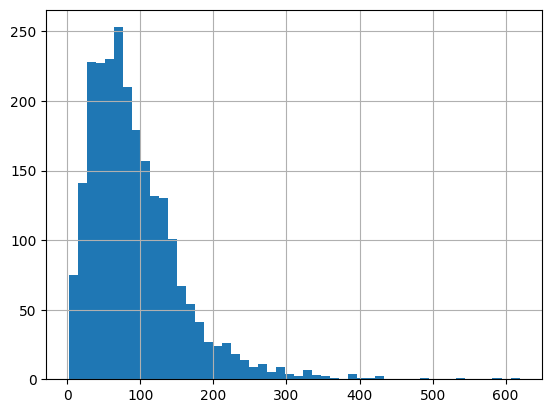

In [14]:
df['comment_length'] = df['comment_cleaned'].apply(len)
print(df['comment_length'].describe())
df['comment_length'].hist(bins=50)
long_comments = df[df['comment_length'] > df['comment_length'].quantile(0.95)]


In [16]:
long_comments = df[df['comment_length'] > df['comment_length'].quantile(0.95)]
long_comments

,Unnamed: 0,comment,counter,id,comment_cleaned,language,comment_lemmatized,comment_length,num_tokens
40,41,"Ich finde, jeder Mensch sollte selbst entschei...",0,41,finde mensch entscheiden oder er leben verbrin...,german,finden mensch entscheiden oder er leben verbri...,328,260
67,68,Ich schließe mich Wundertüte an. Wenn sie Gott...,0,68,schliesse wundertuete gott kennen waeren nicht...,german,schließ wundertuen gott kennen waeren nicht NA...,335,258
100,101,Ich habe grundsätzlich nichts gegen Transgende...,0,104,grundsaetzlich transgender mensch er moechte p...,german,grundsaetzlich transgender mensch er moecht po...,259,247
107,108,Ich weiß nicht ob Transgender etwas im Militär...,0,111,weiss nicht ob transgender militaer suchen ehr...,german,weiß nicht ob transgend militaer suchen ehrlic...,219,220
127,128,Ich finde Gleichberechtigung auch wichtig und ...,0,131,finde gleichberechtigung wichtig und eigentlic...,german,finden gleichberechtigung wichtig und eigentli...,215,200
...,...,...,...,...,...,...,...,...,...
2378,2379,Ich kann den Kommentar von Utopianuser nicht n...,0,2404,kommentar utopianuser nicht nachvollziehen seh...,german,kommentar utopianuser nicht nachvollziehen seh...,409,294
2383,2384,@ Seeannemone Und dann? Wenn alle Geflohenen...,0,2409,seeannemone und geflohenen eu verlassen magisc...,german,seeannemon und geflohen eu verlassen magisch a...,281,239
2385,2386,Ich glaube hier ist es wichtig einen Kontext f...,0,2411,glaube wichtig kontext gewalt skizzieren haeuf...,german,glauben wichtig kontext walen skizzi haeufig w...,290,271
2394,2395,Ich bitte euch darum dieses Bild genau anzuseh...,0,2421,bitte euch bild genau anzusehen menschen schle...,german,bitten ihr bild genau ansehen mensch schlecht ...,240,220


The presence of long comments means that token usage may vary significantly for different requests. Long comments could consume a disproportionate number of tokens, especially when combined with the input prompt and the expected output explanation.
Given the token limits of 10,000 TPM for GPT-4, the variability in comment length means that conservative token estimation is crucial to prevent exceeding rate limits!

##### **SOME NOTES BEFORE RUNNING ZERO-SHOT CLASSIFICATION**

1. **Timeout handling and entries**: By setting a timeout and retry mechanism, we ensure that our process doesn’t halt due to occasional delays or interruptions. If the model doesn’t respond in a reasonable time, retrying ensures that we don’t miss classifications. Assigning a fallback (e.g. marking as not counterspeech) for texts that still fail after retries is crucial for maintaining workflow continuity without introducing errors due to missing responses. We will follow Macanovic & Przepiorka (2024): "We wait for the model to return the output for 20 seconds; if this timeout is exceeded, we retry up to 2 more times, after which we denote text as not containing any coding categories".
* A **try-except block** is used to handle exceptions or errors in Python. When working with the API, there’s always a risk that a request might fail (e.g., rate limit exceeded, connection errors, etc.). Using a try-except block helps ensure that a single failed request does *not* cause the entire script to crash. Instead, we can catch the error, log it, and then either retry the request (as *NA* for instance) or move on to the next comment. This ensures the process continues running smoothly even if there are occasional failures.
2. **Rate limit with timer**: OpenAI API has rate limits, which define the number of requests we can make per minute, especially important when working with large batches of data. By spacing out requests, we ensure we do not exceed token limits or rate limits, which can result in request failures. Adding delays can prevent hitting the token or request limit, allowing smoother processing. This can be handled by adding a time.`sleep(15)` after each API request. **However, we must verify our plan’s rate limits before proceeding, as the limits can vary depending on the type of subscription we have with OpenAI**.
3. Framing it as a "**research assistant**" ensures that the model understands the task in a professional and consistent manner, which can lead to more accurate and contextually aware responses. This technique has been found to improve consistency in how the model follows instructions. This is specified in the role of the model in English, although the input will be in German for consistency!
4. **Monitoring token consumption**: Implement logging to track token usage per request and overall cost, to ensure we stay within budget limits. Use OpenAI's token consumption endpoint or keep a manual log. Every time a request is sent to the API, log the number of tokens used (including both input and output). We can use the len() function to calculate tokens in the input prompt, comment, and output response to approximate token usage for each request.
5. **Batch size**: WE send a number of comments together in each request to API (*not one comment at a time*). To manage the API usage efficiently and ensure that we do not overwhelm the system, we should pace the requests appropriately, perhaps sending them with a short delay in between (e.g. every 2-3 seconds) to reduce the risk of hitting rate limits or causing server issues. This could help speed up the classification process and reduce the load on the API. However, each batch size should fit within the **8,192-token limit** for GPT-4 or 4,096 tokens for GPT-4 Turbo.

In [ ]:
import openai
import pandas as pd
import time
import logging
from tqdm import tqdm
from tenacity import retry, stop_after_attempt, wait_fixed

# Step 1: Set up OpenAI API key
openai.api_key = '' # include your API key here

# Step 2: Load the dataset
df = pd.read_csv("counterspeech/df_cleaned.csv", sep = ",")

# Step 3: Set up logging for monitoring
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Step 4: Prepare the prompt template in German
input_prompt = """Die Texte, die Sie bewerten, sind auf Deutsch geschrieben und stammen von einer Online-Plattform wie Twitter. Sie befassen sich mit Themen wie LGTBI-Rechten, Ökologie und anderen.

Bitte geben Sie an, ob jeder Text:

1. Gegenrede ist
2. Keine Gegenrede ist

Ich werde Ihnen nun den zu analysierenden Text zeigen: "{comment}".

Geben Sie Ihre Antwort in folgender Form, ohne weiteren Kommentar: {{'label' : 0}} für 'keine Gegenrede'; {{'label' : 1}} für 'Gegenrede'."""

# Step 5: Set up a retry mechanism to handle timeouts and API errors
@retry(stop=stop_after_attempt(3), wait=wait_fixed(20))
def get_classification(comment):
    prompt = input_prompt.format(comment=comment)
    try:
        response = openai.ChatCompletion.create(
            model="gpt-4-turbo",
            messages=[
                {"role": "system", "content": "You are a research assistant at a German university."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=10,  # Limit tokens for concise responses
            temperature=0  # Make output deterministic
        )
        return response['choices'][0]['message']['content']
    except Exception as e:
        logging.error(f"Error generating classification: {e}")
        raise

# Step 6: Batch processing the comments
batch_size = 16  # Number of comments per batch
num_batches = len(df) // batch_size + (1 if len(df) % batch_size != 0 else 0)

token_consumption = 0
classifications = []

for batch_idx in tqdm(range(num_batches), desc="Processing Batches"):
    batch_start = batch_idx * batch_size
    batch_end = min((batch_idx + 1) * batch_size, len(df))
    batch_comments = df['comment'][batch_start:batch_end]

    batch_results = []
    for comment in batch_comments:
        try:
            result = get_classification(comment)
            batch_results.append(result)
            token_consumption += len(comment.split()) + 10  # Approximate token count: comment + response
        except Exception as e:
            logging.warning(f"Failed to classify comment after retries: {e}")
            batch_results.append("{ 'label' : 0 }")  # Default to 'not counterspeech' if all retries fail

    classifications.extend(batch_results)
    time.sleep(20)  # Wait 20 seconds between batches to avoid rate limits

# Step 7: Add new labels to the dataframe and save
output_file = '/Users/counterspeech/df_classified_gpt4_turbo.csv'
df['counter_gpt4'] = classifications
df.to_csv(output_file, index=False)

logging.info("Processing complete. Results saved to df_classified_gpt4_turbo.csv.")


Processing Batches: 100%|██████████| 150/150 [4:06:05<00:00, 98.44s/it]    
2024-10-24 22:27:40,056 - INFO - Processing complete. Results saved to df_classified_gpt4_turbo.csv.


In [20]:
df2 = pd.read_csv("/Users/tonigamundi/Desktop/Counterspeech-Amalia/counterspeech/df_classified_gpt4_turbo.csv", sep = ",")
df2

,Unnamed: 0,comment,counter,id,comment_cleaned,language,comment_lemmatized,comment_length,counter_gpt4
0,1,"Schwule, die für ihre Rechte auf die Straße ge...",0,1,schwule rechte strasse gehen schoen sehen frei...,german,schwul rechte strassen gehen scho sehen freihe...,10,{'label' : 0}
1,2,Ich nehme an das ist der Christopher Street Da...,0,2,nehme christopher street day oae asiatischen l...,german,nehmen christopher streen day oa asiatischen l...,19,{'label' : 0}
2,3,Solange Homosexuelle nicht in allen Ländern si...,0,3,solange homosexuelle nicht allen laendern sich...,german,solange homosexuell nicht alle laendern sicher...,18,{'label' : 0}
3,4,Homosexualität wird in unserer Gesellschaft of...,0,4,homosexualitaet gesellschaft oftmals gegeissel...,german,homosexualitaen sellschafen oftmals gegeisselt...,7,{'label' : 0}
4,5,"Echt schade, dass dafür extra eine Parade stat...",0,5,echt schade dafuer extra parade finden und nic...,german,echt schade dafuer extra parade finden und nic...,10,{'label' : 1}
...,...,...,...,...,...,...,...,...,...
2394,2395,Ich bitte euch darum dieses Bild genau anzuseh...,0,2421,bitte euch bild genau anzusehen menschen schle...,german,bitten ihr bild genau ansehen mensch schlecht ...,33,{'label' : 1}
2395,2396,"Wie kannst du nur so etwas behaupten, Wintergr...",1,2422,du behaupten wintergruen meisten unendliches l...,german,du behaupten wintergruen meist unendlich leid ...,11,{'label' : 1}
2396,2397,"Gartenzaunvorstand, zu bist so einseitig. Sie ...",0,2423,gartenzaunvorstand einseitig laufen neuen hoff...,german,gartenzaunvorstehen einseitig laufen neu hoffe...,7,{'label' : 0}
2397,2398,Ich kann usercfor nicht zustimmen. Ich sehe ke...,0,2424,usercfor nicht zustimmen sehe keine wuetenden ...,german,usercfor nicht zustimmen sehe kein wuetend flu...,40,{'label' : 1}


In [21]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Step 1: Extract the GPT-4 labels and convert them to integers
df2['counter_gpt4'] = df2['counter_gpt4'].apply(lambda x: int(x.strip("{'label' : }")))

# Step 2: Prepare the true labels and predicted labels
y_true = df2['counter']  # True labels from human coders
y_pred = df2['counter_gpt4']  # Predicted labels from GPT-4-turbo

# Step 3: Evaluate the model
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_true, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'\nClassification Report:\n{classification_report(y_true, y_pred, target_names=["Not Counterspeech", "Counterspeech"])}')


Accuracy: 0.86
Precision: 0.26
Recall: 0.48
F1 Score: 0.33
Confusion Matrix:
[[1968  251]
 [  94   86]]

Classification Report:
                   precision    recall  f1-score   support

Not Counterspeech       0.95      0.89      0.92      2219
    Counterspeech       0.26      0.48      0.33       180

         accuracy                           0.86      2399
        macro avg       0.60      0.68      0.63      2399
     weighted avg       0.90      0.86      0.88      2399



In [ ]:
df = pd.read_csv("counterspeech/df_cleaned.csv", sep = ",")
df

,Unnamed: 0,comment,counter,id,comment_cleaned,language,comment_lemmatized,comment_length
0,1,"Schwule, die für ihre Rechte auf die Straße ge...",0,1,schwule rechte strasse gehen schoen sehen frei...,german,schwul rechte strassen gehen scho sehen freihe...,10
1,2,Ich nehme an das ist der Christopher Street Da...,0,2,nehme christopher street day oae asiatischen l...,german,nehmen christopher streen day oa asiatischen l...,19
2,3,Solange Homosexuelle nicht in allen Ländern si...,0,3,solange homosexuelle nicht allen laendern sich...,german,solange homosexuell nicht alle laendern sicher...,18
3,4,Homosexualität wird in unserer Gesellschaft of...,0,4,homosexualitaet gesellschaft oftmals gegeissel...,german,homosexualitaen sellschafen oftmals gegeisselt...,7
4,5,"Echt schade, dass dafür extra eine Parade stat...",0,5,echt schade dafuer extra parade finden und nic...,german,echt schade dafuer extra parade finden und nic...,10
...,...,...,...,...,...,...,...,...
2394,2395,Ich bitte euch darum dieses Bild genau anzuseh...,0,2421,bitte euch bild genau anzusehen menschen schle...,german,bitten ihr bild genau ansehen mensch schlecht ...,33
2395,2396,"Wie kannst du nur so etwas behaupten, Wintergr...",1,2422,du behaupten wintergruen meisten unendliches l...,german,du behaupten wintergruen meist unendlich leid ...,11
2396,2397,"Gartenzaunvorstand, zu bist so einseitig. Sie ...",0,2423,gartenzaunvorstand einseitig laufen neuen hoff...,german,gartenzaunvorstehen einseitig laufen neu hoffe...,7
2397,2398,Ich kann usercfor nicht zustimmen. Ich sehe ke...,0,2424,usercfor nicht zustimmen sehe keine wuetenden ...,german,usercfor nicht zustimmen sehe kein wuetend flu...,40


Selected Counterspeech Examples for Few-Shot Prompt:

Empathetic Rebuttal on Refugees and Empathy: 
* Comment: "Ich finde die Kommentare einfach nur furchtbar. Wie kann man so herzlos sein gegenüber unseren Mitmenschen. Wir würden auch Hilfe wollen, wenn wir in der gleichen Situation wären."
* Rationale: This comment uses empathy to counter negative attitudes toward refugees by inviting readers to consider themselves in a similar situation. It’s direct yet compassionate, making it a strong example of counterspeech that humanizes refugees.

Rational Argument on Gender Identity and Societal Progress
* Comment: "Jeder sollte so sein, wie er sich fühlt. Ich verstehe es zwar auch nicht, aber man sollte sie respektieren. Quatschgerede mit Gott, mal ein bisschen mit der Zeit gehen und nicht noch im Jahr 1600 leben."
* Rationale: Here, the commenter encourages tolerance toward gender expression and dismisses outdated beliefs. The comment shows rational support for diversity and progressiveness, making it a fitting example of a logical counterspeech argument.

Supportive Counterspeech on Same-Sex Parenting
* Comment: "Warum sollten zwei Männer nicht in der Lage sein, ein Kind großzuziehen? Es gibt so viele Kinder, die in schwierigen Verhältnissen aufwachsen, wo Mutter und Vater ständig streiten oder keine Zeit für den Nachwuchs aufbringen. Wichtig ist, dass ein Kind geliebt wird und in einem intakten Umfeld aufwächst, egal ob das aus zwei Männern besteht oder nicht."
* Rationale: This comment supports same-sex parenting by arguing that love and a stable environment are more important for a child than traditional family structures. It addresses a common social bias with evidence-based reasoning.

Moral Appeal on LGBTQ+ Rights and Freedom
* Comment: "Alle sollten wen oder was lieben dürfen, was sie möchten. Das Wichtigste in unserem kurzen Leben ist es doch, glücklich zu sein. Wie kann man denn den Anblick des Glückes anderer Menschen eklig finden?"
* Rationale: This comment highlights freedom and the right to happiness, challenging those who find same-sex affection objectionable. It’s a powerful example of counterspeech that appeals to universal human rights and happiness.

Critique of Misconceptions on Refugees and Criminality
* Comment: "Ihr übertreibt mit euren Hasskommentaren. Keiner von euch kennt einen auf dem Foto, aber gleich unterstellt ihr ihnen schlechte Motive."
* Rationale: This comment directly counters unfounded prejudices by pointing out the assumption of negative motives without knowledge. It demonstrates a calm, fact-based approach to dispelling misconceptions, showing a different counterspeech strategy.

Each comment provides a unique way of countering hate, from empathy and moral appeals to rational arguments and critiques of bias. Also, these comments are concise yet articulate, making them suitable for few-shot prompting without using excessive tokens.

Input Prompt:



In [ ]:
#pip install tiktoken
import tiktoken

# Initialize tokenizer for text-embedding-ada-002
tokenizer = tiktoken.get_encoding("cl100k_base")

# Example to estimate total tokens in your dataset
total_tokens = sum(len(tokenizer.encode(comment)) for comment in df['comment'])
print(f"Total tokens: {total_tokens}")

# This means 5.88$ for 58752 tokens. So about 12$ for word and document embeddings in total.


BATCH API (see OpenAI documentation: https://platform.openai.com/docs/guides/batch/getting-started). Why?

Rate limits are measured in five ways: RPM (requests per minute), RPD (requests per day), TPM (tokens per minute), TPD (tokens per day), and IPM (images per minute). Rate limits can be hit across any of the options depending on what occurs first. For example, you might send 20 requests with only 100 tokens to the ChatCompletions endpoint and that would fill your limit (if your RPM was 20), even if you did not send 150k tokens (if your TPM limit was 150k) within those 20 requests.


# Word embeddings using OpenAI's text-embedding-ada-002 (via API)

In [ ]:
# pip install openai tqdm
import openai  #to access API
import pandas as pd 
import numpy as np
from tqdm import tqdm  #for a progress bar (optional)

# Step 2: Set up OpenAI API key
openai.api_key = '' # include you API key for replication

# Step 3: Load the dataset
df = pd.read_csv("counterspeech/df_cleaned.csv", sep = ",")
df_filtered = df[['id', 'comment_cleaned']]

# Step 4: Function to get embeddings from OpenAI

def get_embedding(text, model="text-embedding-ada-002"):
    try:
        response = openai.Embedding.create(input=text, model=model)
        embedding = response['data'][0]['embedding']
        return embedding
    except Exception as e:
        print(f"Error generating embedding: {e}")
        return None

# Step 5: Generate embeddings for each cleaned comment
embeddings = []
for comment in tqdm(df_filtered['comment_cleaned'], desc="Generating Embeddings"):
    embedding = get_embedding(comment)
    embeddings.append(embedding)

# Step 6: Store embeddings in the dataframe
df_filtered['embedding'] = embeddings

# Step 7: Save the dataframe with embeddings for later use
df_filtered.to_csv('document_embeddings_openai.csv', index=False)

print("Embeddings have been successfully generated and saved.")

In [ ]:
df_embeddings = pd.read_csv("counterspeech/document_embeddings_openai.csv")
df_cleaned = pd.read_csv("counterspeech/df_cleaned.csv", sep = ",")

# Merge the two datasets on the 'id' column
df_merged = pd.merge(df_embeddings, df_cleaned[['id', 'counter']], on='id')

# Save the merged dataset to a new CSV file
df_merged.to_csv('df_cleaned_embedded_ada.csv', index=False)

# Check the merged dataset
print(df_merged.head())

   id                                    comment_cleaned  \
0   1  schwule rechte strasse gehen schoen sehen frei...   
1   2  nehme christopher street day oae asiatischen l...   
2   3  solange homosexuelle nicht allen laendern sich...   
3   4  homosexualitaet gesellschaft oftmals gegeissel...   
4   5  echt schade dafuer extra parade finden und nic...   

                                           embedding  counter  
0  [0.011761805042624474, -0.01152750663459301, 0...        0  
1  [0.007596342824399471, -0.003047893987968564, ...        0  
2  [-0.004874377511441708, -0.006366932298988104,...        0  
3  [0.0003481853927951306, 0.0063161905854940414,...        0  
4  [-0.0030210288241505623, -0.017139380797743797...        0  


### Logistic regression

In [ ]:
df = pd.read_csv('counterspeech/df_cleaned_embedded_ada.csv')
print(df.columns)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Step 1: Load the dataset with OpenAI embeddings
df = pd.read_csv('counterspeech/df_cleaned_embedded_ada.csv')

# Define a function to safely parse the embedding strings
def parse_embedding_string(embedding_str):
    return list(map(float, embedding_str.strip('[]').split()))

# Step 2: Prepare the features (document embeddings) and target (counter)
# Define a function to safely parse the embedding strings
def parse_embedding_string(embedding_str):
    # Remove brackets and split by commas, then convert each part to a float
    return list(map(float, embedding_str.strip('[]').replace(',', '').split()))

# Apply the function to convert the embeddings to lists of floats
X = df['embedding'].apply(parse_embedding_string).tolist()
y = df['counter']  # Target variable (counterspeech label)

# Step 3: Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9999999, stratify=y)

# Step 4: Initialize and train a logistic regression model
logreg = LogisticRegression(penalty="l1",solver="liblinear", max_iter=1000, class_weight='balanced') # Increased max_iter to ensure convergence + weights
logreg.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = logreg.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'\nClassification Report:\n{classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"])}')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Step 1: Load the dataset with document embeddings
df = pd.read_csv('counterspeech/df_cleaned_embedded_ada.csv')

# Define a function to parse the embedding strings
def parse_embedding_string(embedding_str):
    # Remove brackets and split by commas, then convert each part to a float
    return list(map(float, embedding_str.strip('[]').replace(',', '').split()))

# Step 2: Prepare the features (document embeddings) and target (counter)
X = df['embedding'].apply(parse_embedding_string).tolist()
y = df['counter']  # Target variable (counterspeech label)

# Step 3: Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9999999, stratify=y)

# Step 4: Apply SMOTE to the training set
smote = SMOTE(random_state=9999999)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Initialize and train a logistic regression model
logreg = LogisticRegression(penalty="l1", solver="liblinear", max_iter=1000, class_weight='balanced') # Increased max_iter to ensure convergence + weights
logreg.fit(X_train_resampled, y_train_resampled)

# Step 6: Predict on the test set
y_pred = logreg.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'\nClassification Report:\n{classification_report(y_test, y_pred, target_names=["Not Counterspeech", "Counterspeech"])}')

# Hateful Speech Classifier (PART 2)

### 1) Document embeddings

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk

# Download German stopwords from NLTK if not already downloaded
nltk.download('stopwords')

In [ ]:
df = pd.read_csv('hateful/final_hateful.csv')
print(df.columns)

In [9]:
# Import required libraries
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 2: Preprocess comments for Doc2Vec (tokenization is needed)
df['comment_tokens'] = df['comment'].apply(lambda x: x.split())

# Step 3: Tag each document for Doc2Vec
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df['comment_tokens'])]

# Step 4: Train a Doc2Vec model
# Initialize the Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=2, workers=4, epochs=40)
doc2vec_model.build_vocab(documents)

# Train the model on the documents
doc2vec_model.train(documents, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# Step 5: Generate document embeddings for each comment
df['comment_embedding'] = df['comment_tokens'].apply(lambda x: doc2vec_model.infer_vector(x))

# Step 6: Prepare data for Linear Regression
# Extract embeddings into a separate DataFrame, converting each embedding list into columns
embeddings = pd.DataFrame(df['comment_embedding'].tolist())

# Set the target variable
y = df['score']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, y, test_size=0.2, random_state=42)

# Step 7: Train a Linear Regression model using embeddings as predictors
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 8: Make predictions and evaluate the model
y_pred = linear_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

In [ ]:
# Import required libraries
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Step 2: Preprocess comments for Doc2Vec (tokenization is needed)
df['comment_tokens'] = df['comment'].apply(lambda x: x.split())

# Step 3: Tag each document for Doc2Vec
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df['comment_tokens'])]

# Step 4: Train a Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=2, workers=4, epochs=40)
doc2vec_model.build_vocab(documents)
doc2vec_model.train(documents, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# Step 5: Generate document embeddings for each comment
df['comment_embedding'] = df['comment_tokens'].apply(lambda x: doc2vec_model.infer_vector(x))

# Step 6: Prepare data for Linear Regression with additional covariates
# Extract embeddings into a DataFrame, converting each embedding list into columns
embeddings = pd.DataFrame(df['comment_embedding'].tolist())

# Select the additional covariates as features and apply one-hot encoding to categorical variables
covariates = df[['group', 'PropNA', 'state', 'education', 'employment', 'age', 'inhabitants', 'gender', 'East']]

# Use one-hot encoding for categorical variables
covariates = pd.get_dummies(covariates, drop_first=True)

# Combine embeddings with covariates
X = pd.concat([embeddings, covariates.reset_index(drop=True)], axis=1)

# Convert all column names to strings to avoid any issues
X.columns = X.columns.astype(str)

# Set the target variable
y = df['score']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Linear Regression model using embeddings and covariates as predictors
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 8: Make predictions and evaluate the model
y_pred = linear_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared to assess improvement
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r_squared}")


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
df = pd.read_csv('hateful/final_hateful_cleaned.csv')

# Step 1: Generate TF-IDF Features (Unigrams)
# Initialize the TF-IDF Vectorizer with unigrams only
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1))  # (1,1) specifies unigrams
X_tfidf = tfidf_vectorizer.fit_transform(df['comment_cleaned'])

# Convert the TF-IDF sparse matrix to a DataFrame for easier analysis
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,10000,1000e,100x,1111,12,13,13jaehrige,14,150,15jaehrige,...,zwischendurch,zwischenfaellen,zwischenmenschliche,zwischenzeitlich,zwoelf,zynisch,zynische,zynismus,zypern,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression

df = pd.read_csv('hateful/final_hateful_cleaned.csv')
# Initialize the TF-IDF Vectorizer with min_df set to 5
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1), min_df=2)

# Fit and transform the cleaned comments
X_tfidf = tfidf_vectorizer.fit_transform(df['comment_cleaned'])

# Convert the TF-IDF matrix to a DataFrame for easier interpretation (optional)
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the resulting TF-IDF DataFrame
print(tfidf_df)


        13   14   16  1945  1989  2015  20152016  2016  2017  2018  ...  \
0      0.0  0.0  0.0   0.0   0.0   0.0       0.0   0.0   0.0   0.0  ...   
1      0.0  0.0  0.0   0.0   0.0   0.0       0.0   0.0   0.0   0.0  ...   
2      0.0  0.0  0.0   0.0   0.0   0.0       0.0   0.0   0.0   0.0  ...   
3      0.0  0.0  0.0   0.0   0.0   0.0       0.0   0.0   0.0   0.0  ...   
4      0.0  0.0  0.0   0.0   0.0   0.0       0.0   0.0   0.0   0.0  ...   
...    ...  ...  ...   ...   ...   ...       ...   ...   ...   ...  ...   
11156  0.0  0.0  0.0   0.0   0.0   0.0       0.0   0.0   0.0   0.0  ...   
11157  0.0  0.0  0.0   0.0   0.0   0.0       0.0   0.0   0.0   0.0  ...   
11158  0.0  0.0  0.0   0.0   0.0   0.0       0.0   0.0   0.0   0.0  ...   
11159  0.0  0.0  0.0   0.0   0.0   0.0       0.0   0.0   0.0   0.0  ...   
11160  0.0  0.0  0.0   0.0   0.0   0.0       0.0   0.0   0.0   0.0  ...   

       zweiweltkrieg  zwiegespalten  zwingen  zwingend  zwingt  zwinkern  \
0                0.0   

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Prepare target variable
y = df['score']

# Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y, test_size=0.2, random_state=9999)

# Step 4: Train a Linear Regression model using TF-IDF features as predictors
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = linear_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared for model performance
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r_squared}")

# Step 6: Analyze Feature Importance (Coefficients)
# Extract the coefficients from the linear model
coefficients = linear_model.coef_

# Combine feature names with their corresponding coefficients
feature_importance = pd.DataFrame({
    'feature': tfidf_vectorizer.get_feature_names_out(),
    'coefficient': coefficients
})

# Sort features by absolute value of the coefficient to see which have the largest impact
feature_importance['abs_coefficient'] = feature_importance['coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coefficient', ascending=False)

# Display top 10 features affecting hatefulness the most
print("Top 10 Features Affecting Hatefulness (Score):")
print(feature_importance.head(10)[['feature', 'coefficient']])


Mean Squared Error (MSE): 5.841138296258204e+26
R-squared: -2.371113795954594e+26
Top 10 Features Affecting Hatefulness (Score):
          feature   coefficient
665       baecker -7.743538e+14
518    aufteilung -7.171560e+14
93     abzuhalten -5.208846e+14
284   angrenzende  5.157798e+14
475    aufgeladen -4.933767e+14
446            at  4.430320e+14
319     anrichten  4.414303e+14
442         asyls -4.276593e+14
0              13 -3.799610e+14
3155     jaehrige  3.799610e+14


#### 2.2) TF-IDF unigrams with COVARIATES

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression

df = pd.read_csv('hateful/final_hateful_cleaned.csv')
# Initialize the TF-IDF Vectorizer with min_df set to 5
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1), min_df=2)

# Fit and transform the cleaned comments
X_tfidf = tfidf_vectorizer.fit_transform(df['comment_cleaned'])

# Convert the TF-IDF matrix to a DataFrame for easier interpretation (optional)
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the resulting TF-IDF DataFrame
print(tfidf_df)

## 2) Binary outcome for hateful speech

In [ ]:
import pandas as pd

df = pd.read_csv('hateful/final_hateful_cleaned.csv')

# Calculate the median of the 'score' variable
median_score = df['score'].median()

# Print the median to understand the threshold value
print(f"Median score: {median_score}")

# Create a new binary column 'hateful' based on the median threshold
df['hateful'] = df['score'].apply(lambda x: 1 if x > median_score else 0)

# Display the first few rows to check the new classification
print(df[['score', 'hateful']].head())

# Check the distribution of the 'hateful' variable
class_distribution = df['hateful'].value_counts()

# Print the count of each class
print("Class distribution (count):")
print(class_distribution)

# Calculate the percentage distribution
class_distribution_percent = df['hateful'].value_counts(normalize=True) * 100

# Print the percentage of each class
print("\nClass distribution (percentage):")
print(class_distribution_percent)


In [ ]:
import pandas as pd

df = pd.read_csv('/hateful/final_hateful_cleaned.csv')

# Create a new binary column 'hateful' based on the threshold
df['hateful'] = df['score'].apply(lambda x: 1 if x > 5 else 0)

# Display the first few rows to check the new classification
print(df[['score', 'hateful']].head())

# Check the distribution of the 'hateful' variable
class_distribution = df['hateful'].value_counts()

# Print the count of each class
print("Class distribution (count):")
print(class_distribution)

# Calculate the percentage distribution
class_distribution_percent = df['hateful'].value_counts(normalize=True) * 100

# Print the percentage of each class
print("\nClass distribution (percentage):")
print(class_distribution_percent)

### 3) TF-IDF unigrams vs. trigrams

In [4]:
# Import required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Generate TF-IDF with unigrams based on 'comment_cleaned'
tfidf_vectorizer_uni = TfidfVectorizer(ngram_range=(1, 1), min_df=2)
X_uni = tfidf_vectorizer_uni.fit_transform(df['comment_cleaned'])

# Step 2: Generate TF-IDF with trigrams based on 'comment_cleaned'
tfidf_vectorizer_tri = TfidfVectorizer(ngram_range=(3, 3), min_df=2)
X_tri = tfidf_vectorizer_tri.fit_transform(df['comment_cleaned'])

# Target variable
y = df['hateful']

# Split data into training and test sets for both unigram and trigram features
X_train_uni, X_test_uni, y_train, y_test = train_test_split(X_uni, y, test_size=0.2, random_state=1998, stratify=y)
X_train_tri, X_test_tri, y_train, y_test = train_test_split(X_tri, y, test_size=0.2, random_state=1998, stratify=y)

# Step 3: Train logistic regression model with unigrams
logistic_uni = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_uni.fit(X_train_uni, y_train)

# Step 4: Train logistic regression model with trigrams
logistic_tri = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_tri.fit(X_train_tri, y_train)

# Step 5: Evaluate model performance on the test set for unigrams
y_pred_uni = logistic_uni.predict(X_test_uni)
accuracy_uni = accuracy_score(y_test, y_pred_uni)
precision_uni = precision_score(y_test, y_pred_uni)
recall_uni = recall_score(y_test, y_pred_uni)
f1_uni = f1_score(y_test, y_pred_uni)

print("Unigram Model Performance:")
print(f"Accuracy: {accuracy_uni:.4f}")
print(f"Precision: {precision_uni:.4f}")
print(f"Recall: {recall_uni:.4f}")
print(f"F1 Score: {f1_uni:.4f}\n")

# Step 5: Evaluate model performance on the test set for trigrams
y_pred_tri = logistic_tri.predict(X_test_tri)
accuracy_tri = accuracy_score(y_test, y_pred_tri)
precision_tri = precision_score(y_test, y_pred_tri)
recall_tri = recall_score(y_test, y_pred_tri)
f1_tri = f1_score(y_test, y_pred_tri)

print("Trigram Model Performance:")
print(f"Accuracy: {accuracy_tri:.4f}")
print(f"Precision: {precision_tri:.4f}")
print(f"Recall: {recall_tri:.4f}")
print(f"F1 Score: {f1_tri:.4f}")

from sklearn.metrics import classification_report, confusion_matrix

# Unigram Model Evaluation
print("Unigram Model Performance Report:")
print(classification_report(y_test, y_pred_uni, target_names=["Non-Hateful", "Hateful"]))

# Confusion Matrix for Unigram Model
print("\nUnigram Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_uni))

# Trigram Model Evaluation
print("\nTrigram Model Performance Report:")
print(classification_report(y_test, y_pred_tri, target_names=["Non-Hateful", "Hateful"]))

# Confusion Matrix for Trigram Model
print("\nTrigram Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tri))


Unigram Model Performance:
Accuracy: 0.7604
Precision: 0.4940
Recall: 0.7091
F1 Score: 0.5824

Trigram Model Performance:
Accuracy: 0.7412
Precision: 0.3587
Recall: 0.1255
F1 Score: 0.1859
Unigram Model Performance Report:
              precision    recall  f1-score   support

 Non-Hateful       0.90      0.78      0.83      1707
     Hateful       0.49      0.71      0.58       526

    accuracy                           0.76      2233
   macro avg       0.70      0.74      0.71      2233
weighted avg       0.80      0.76      0.77      2233


Unigram Model Confusion Matrix:
[[1325  382]
 [ 153  373]]

Trigram Model Performance Report:
              precision    recall  f1-score   support

 Non-Hateful       0.78      0.93      0.85      1707
     Hateful       0.36      0.13      0.19       526

    accuracy                           0.74      2233
   macro avg       0.57      0.53      0.52      2233
weighted avg       0.68      0.74      0.69      2233


Trigram Model Confusion Mat

In [ ]:
import pandas as pd

df = pd.read_csv('hateful/final_hateful_cleaned.csv')

# Calculate the median of the 'score' variable
median_score = df['score'].median()

# Print the median to understand the threshold value
print(f"Median score: {median_score}")

# Create a new binary column 'hateful' based on the median threshold
df['hateful'] = df['score'].apply(lambda x: 1 if x > median_score else 0)

# Import required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Generate TF-IDF with unigrams based on 'comment_cleaned'
tfidf_vectorizer_uni = TfidfVectorizer(ngram_range=(1, 1), min_df=2)
X_uni = tfidf_vectorizer_uni.fit_transform(df['comment_cleaned'])

# Step 2: Generate TF-IDF with trigrams based on 'comment_cleaned'
tfidf_vectorizer_tri = TfidfVectorizer(ngram_range=(3, 3), min_df=2)
X_tri = tfidf_vectorizer_tri.fit_transform(df['comment_cleaned'])

# Target variable
y = df['hateful']

# Split data into training and test sets for both unigram and trigram features
X_train_uni, X_test_uni, y_train, y_test = train_test_split(X_uni, y, test_size=0.2, random_state=1998, stratify=y)
X_train_tri, X_test_tri, y_train, y_test = train_test_split(X_tri, y, test_size=0.2, random_state=1998, stratify=y)

# Step 3: Train logistic regression model with unigrams
logistic_uni = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_uni.fit(X_train_uni, y_train)

# Step 4: Train logistic regression model with trigrams
logistic_tri = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_tri.fit(X_train_tri, y_train)

# Step 5: Evaluate model performance on the test set for unigrams
y_pred_uni = logistic_uni.predict(X_test_uni)
accuracy_uni = accuracy_score(y_test, y_pred_uni)
precision_uni = precision_score(y_test, y_pred_uni)
recall_uni = recall_score(y_test, y_pred_uni)
f1_uni = f1_score(y_test, y_pred_uni)

print("Unigram Model Performance:")
print(f"Accuracy: {accuracy_uni:.4f}")
print(f"Precision: {precision_uni:.4f}")
print(f"Recall: {recall_uni:.4f}")
print(f"F1 Score: {f1_uni:.4f}\n")

# Step 5: Evaluate model performance on the test set for trigrams
y_pred_tri = logistic_tri.predict(X_test_tri)
accuracy_tri = accuracy_score(y_test, y_pred_tri)
precision_tri = precision_score(y_test, y_pred_tri)
recall_tri = recall_score(y_test, y_pred_tri)
f1_tri = f1_score(y_test, y_pred_tri)

print("Trigram Model Performance:")
print(f"Accuracy: {accuracy_tri:.4f}")
print(f"Precision: {precision_tri:.4f}")
print(f"Recall: {recall_tri:.4f}")
print(f"F1 Score: {f1_tri:.4f}")

from sklearn.metrics import classification_report, confusion_matrix

# Unigram Model Evaluation
print("Unigram Model Performance Report:")
print(classification_report(y_test, y_pred_uni, target_names=["Non-Hateful", "Hateful"]))

# Confusion Matrix for Unigram Model
print("\nUnigram Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_uni))

# Trigram Model Evaluation
print("\nTrigram Model Performance Report:")
print(classification_report(y_test, y_pred_tri, target_names=["Non-Hateful", "Hateful"]))

# Confusion Matrix for Trigram Model
print("\nTrigram Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tri))


Median score: 3.69230769230769
Unigram Model Performance:
Accuracy: 0.7206
Precision: 0.7135
Recall: 0.7366
F1 Score: 0.7249

Trigram Model Performance:
Accuracy: 0.5817
Precision: 0.5512
Recall: 0.8772
F1 Score: 0.6770
Unigram Model Performance Report:
              precision    recall  f1-score   support

 Non-Hateful       0.73      0.70      0.72      1117
     Hateful       0.71      0.74      0.72      1116

    accuracy                           0.72      2233
   macro avg       0.72      0.72      0.72      2233
weighted avg       0.72      0.72      0.72      2233


Unigram Model Confusion Matrix:
[[787 330]
 [294 822]]

Trigram Model Performance Report:
              precision    recall  f1-score   support

 Non-Hateful       0.70      0.29      0.41      1117
     Hateful       0.55      0.88      0.68      1116

    accuracy                           0.58      2233
   macro avg       0.63      0.58      0.54      2233
weighted avg       0.63      0.58      0.54      2233




In [ ]:
#pip install xgboost
# Import required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('/hateful/final_hateful_cleaned.csv')

# Calculate the median of the 'score' variable
median_score = df['score'].median()
df['hateful'] = df['score'].apply(lambda x: 1 if x > median_score else 0)

# Step 1: Generate TF-IDF for unigrams and trigrams based on 'comment_cleaned'
tfidf_vectorizer_uni = TfidfVectorizer(ngram_range=(1, 1), min_df=2)
tfidf_vectorizer_tri = TfidfVectorizer(ngram_range=(3, 3), min_df=2)
X_uni = tfidf_vectorizer_uni.fit_transform(df['comment_cleaned'])
X_tri = tfidf_vectorizer_tri.fit_transform(df['comment_cleaned'])

# Target variable
y = df['hateful']

# Split data into training and test sets for both unigram and trigram features
X_train_uni, X_test_uni, y_train, y_test = train_test_split(X_uni, y, test_size=0.2, random_state=1998, stratify=y)
X_train_tri, X_test_tri, _, _ = train_test_split(X_tri, y, test_size=0.2, random_state=1998, stratify=y)

# Define function to train model and evaluate metrics
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, feature_type):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"{model_name} with {feature_type} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")
    print(classification_report(y_test, y_pred, target_names=["Non-Hateful", "Hateful"]))
    print(f"Confusion Matrix for {model_name} with {feature_type}:\n{confusion_matrix(y_test, y_pred)}\n")
    
# Define models
models = [
    ("Decision Tree", DecisionTreeClassifier(class_weight="balanced")),
    ("Random Forest", RandomForestClassifier(class_weight="balanced", random_state=1998)),
    ("SVM", SVC(class_weight="balanced", probability=True))
]

# Evaluate each model with unigrams and trigrams
for model_name, model in models:
    evaluate_model(model, X_train_uni, X_test_uni, y_train, y_test, model_name, "Unigrams")
    evaluate_model(model, X_train_tri, X_test_tri, y_train, y_test, model_name, "Trigrams")


Decision Tree with Unigrams Performance:
Accuracy: 0.6382
Precision: 0.6405
Recall: 0.6290
F1 Score: 0.6347

              precision    recall  f1-score   support

 Non-Hateful       0.64      0.65      0.64      1117
     Hateful       0.64      0.63      0.63      1116

    accuracy                           0.64      2233
   macro avg       0.64      0.64      0.64      2233
weighted avg       0.64      0.64      0.64      2233

Confusion Matrix for Decision Tree with Unigrams:
[[723 394]
 [414 702]]

Decision Tree with Trigrams Performance:
Accuracy: 0.5508
Precision: 0.5299
Recall: 0.8961
F1 Score: 0.6660

              precision    recall  f1-score   support

 Non-Hateful       0.66      0.21      0.31      1117
     Hateful       0.53      0.90      0.67      1116

    accuracy                           0.55      2233
   macro avg       0.60      0.55      0.49      2233
weighted avg       0.60      0.55      0.49      2233

Confusion Matrix for Decision Tree with Trigrams:
[[ 2

Across all classifiers, unigram models consistently outperform trigram models. Trigrams tend to over-predict hatefulness due to their specificity, resulting in low precision and high false positive rates. For social science applications, this suggests that unigrams capture enough context without being too specific, making them more reliable for identifying hatefulness in comments.

The **SVM with unigrams** stands out as the best-performing model, with a strong balance between **precision, recall, and accuracy**.

##### WITH METADATA

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from scipy.sparse import hstack

# Load the dataset
df = pd.read_csv('/hateful/final_hateful_cleaned.csv')

# Calculate the median of the 'score' variable
median_score = df['score'].median()
df['hateful'] = df['score'].apply(lambda x: 1 if x > median_score else 0)

# Step 1: Generate TF-IDF for unigrams and trigrams based on 'comment_cleaned'
tfidf_vectorizer_uni = TfidfVectorizer(ngram_range=(1, 1), min_df=2)
tfidf_vectorizer_tri = TfidfVectorizer(ngram_range=(3, 3), min_df=2)
X_uni = tfidf_vectorizer_uni.fit_transform(df['comment_cleaned'])
X_tri = tfidf_vectorizer_tri.fit_transform(df['comment_cleaned'])

# Target variable
y = df['hateful']

# Select metadata features (sociodemographics and group)
metadata = df[['group', 'state', 'education', 'employment', 'age', 'inhabitants', 'gender', 'East']]

# Convert metadata to numerical values (if necessary, e.g., categorical encoding)
metadata = pd.get_dummies(metadata, drop_first=True)

# Convert metadata DataFrame to sparse format to concatenate with TF-IDF features
from scipy.sparse import csr_matrix
metadata_sparse = csr_matrix(metadata.values)

# Combine TF-IDF features with metadata for both unigrams and trigrams
X_uni_with_metadata = hstack([X_uni, metadata_sparse])
X_tri_with_metadata = hstack([X_tri, metadata_sparse])

# Split data into training and test sets for both unigram and trigram features
X_train_uni, X_test_uni, y_train, y_test = train_test_split(X_uni_with_metadata, y, test_size=0.2, random_state=1998, stratify=y)
X_train_tri, X_test_tri, _, _ = train_test_split(X_tri_with_metadata, y, test_size=0.2, random_state=1998, stratify=y)

# Define function to train model and evaluate metrics
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, feature_type):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"{model_name} with {feature_type} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")
    print(classification_report(y_test, y_pred, target_names=["Non-Hateful", "Hateful"]))
    print(f"Confusion Matrix for {model_name} with {feature_type}:\n{confusion_matrix(y_test, y_pred)}\n")
    
# Define models
models = [
    ("Decision Tree", DecisionTreeClassifier(class_weight="balanced")),
    ("Random Forest", RandomForestClassifier(class_weight="balanced", random_state=1998)),
    ("SVM", SVC(class_weight="balanced", probability=True)),
    ("Logistic Regression", LogisticRegression(max_iter=1000, class_weight="balanced"))
]

# Evaluate each model with unigrams and trigrams
for model_name, model in models:
    evaluate_model(model, X_train_uni, X_test_uni, y_train, y_test, model_name, "Unigrams with Metadata")
    evaluate_model(model, X_train_tri, X_test_tri, y_train, y_test, model_name, "Trigrams with Metadata")


Decision Tree with Unigrams with Metadata Performance:
Accuracy: 0.6279
Precision: 0.6251
Recall: 0.6380
F1 Score: 0.6315

              precision    recall  f1-score   support

 Non-Hateful       0.63      0.62      0.62      1117
     Hateful       0.63      0.64      0.63      1116

    accuracy                           0.63      2233
   macro avg       0.63      0.63      0.63      2233
weighted avg       0.63      0.63      0.63      2233

Confusion Matrix for Decision Tree with Unigrams with Metadata:
[[690 427]
 [404 712]]

Decision Tree with Trigrams with Metadata Performance:
Accuracy: 0.6090
Precision: 0.5885
Recall: 0.7240
F1 Score: 0.6493

              precision    recall  f1-score   support

 Non-Hateful       0.64      0.49      0.56      1117
     Hateful       0.59      0.72      0.65      1116

    accuracy                           0.61      2233
   macro avg       0.62      0.61      0.60      2233
weighted avg       0.62      0.61      0.60      2233

Confusion Ma